In [1]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [2]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [3]:
!ls

 ANN_numpy.ipynb		     mapsmaze_140.png   mapsmaze_60.png
 car.py				     mapsmaze_160.png   mapsmaze_80.png
'Copy of MAZE_SIMULATOR (1).ipynb'   mapsmaze_180.png   MAZE_SIMULATOR.ipynb
'Copy of MAZE_SIMULATOR.ipynb'	     mapsmaze_200.png   medium_maze
 demo_code.py			     mapsmaze_20.png    mediummaze.ipynb
 environment_model.py		     mapsmaze_220.png   Monalisa.ipynb
 game.py			     mapsmaze_240.png   owfw.ipynb
'hard maze'			     mapsmaze_260.png   ProjectDev.ipynb
 image_test.ipynb		     mapsmaze_280.png   Project.ipynb
 image_test.py			     mapsmaze_300.png   __pycache__
 IS698Finalsubmission.ipynb	     mapsmaze_320.png   testmaze.ipynb
 IS698Project.ipynb		     mapsmaze_340.png   Untitled0.ipynb
 map.py				     mapsmaze_360.png   Untitled3.ipynb
 maps				     mapsmaze_380.png   Untitled4.ipynb
 mapsmaze_0.png			     mapsmaze_399.png   webscraping.ipynb
 mapsmaze_100.png		     mapsmaze_400.png
 mapsmaze_120.png		     mapsmaze_40.png


In [4]:
########
##PARAMETERS
########
# robot max speed, in world units per timestep
speed = 0.1

# epsilon distance for considering goal reached, collisions, etc.
epsilon = 0.01
sqEpsilon = epsilon**2

# interval to update visualization
visInterval = 20

# max simulation timesteps
timeout = 400
########
##UTILITY
########
from shapely.geometry import Point, LineString
import copy

def sqDistance(pos1, pos2):
    return (pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2

def isGoal(state):
    return sqDistance(state['position'], state['goal']) < sqEpsilon

# direction a given offset from the current heading, after normalizing (all in radians)
def newHeading(currentHeading, amount):
    return (currentHeading + amount) % (math.pi * 2.0)

# distance to the nearest obstacle in a given direction
def rangeSensor(pos, direction, obstacles, maxDist):
    pos2 = (pos[0] + math.cos(direction) * maxDist,
          pos[1] + math.sin(direction) * maxDist)
    testray = LineString([pos, pos2])
    collisions = [testray.intersection(obstacle) for obstacle in obstacles]
    posPt = Point(pos[0], pos[1])
    distances = [posPt.distance(c) for c in collisions if c]
    try:
        o = min(distances)
    except: 
        o = 0.01
    return o


#####################################
###########VISUALIZATION
############################################
import math
from PIL import Image, ImageDraw
from IPython.display import display


scalefactor = 40 # pixels per 'maze unit' for vis purposes
border = 5       # in pixels
markersize = 3   # in pixels, should be even
linewidth = 2    # in pixels

# convert world-space coordinate to pixel coordinate
def coord(x):
    if type(x) is list:
        return [coord(elem) for elem in x]
    elif type(x) is tuple:
        return tuple(coord(elem) for elem in x)
    else:
        return int(scalefactor*x) + border

# returns bounds for ImageDraw.Draw.ellipse()
def marker(x):
    return list(i - markersize for i in coord(x)) + list(i + markersize for i in coord(x))


def showmaze(m,i):
    width = m['dimensions'][0]
    height = m['dimensions'][1]
    img = Image.new("RGB", (int(width*scalefactor) + 2*border, int(height*scalefactor) + 2*border), 'white')
    img1 = ImageDraw.Draw(img)
    img1.rectangle(coord([0.0, 0.0, width, height]), None, 'black')
    img1.ellipse(marker(m['position']), 'black')
    img1.ellipse(marker(m['goal']), 'red')
    for obstacle in m['obstacles']:
        img1.line(coord(obstacle), 'black', linewidth)
    mazeNamePNG = "maze_" + str(i) + ".png"
    img.save('/content/drive/MyDrive/Colab Notebooks/maps' + mazeNamePNG)
    display(img)



#MAZE ENVIRONMENT 
Below are the different kind of maze maps created to test Evolution strategies algorithms. The large dark circle represents the start postion of the robot whereas the red circle represents the goal where the dard circle needs to reach with Evolution strategies.

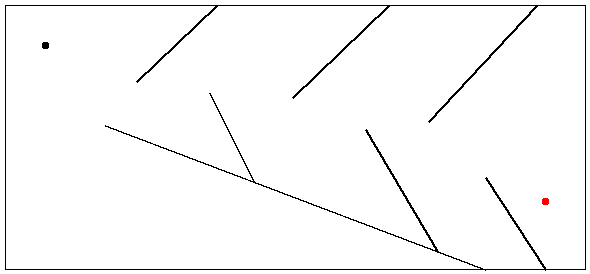

In [5]:
mediumMaze = {
    'dimensions': (14.5, 6.6),

    # obstacles are lines specified as [(x1,y1),(x2,y2)],
    #   where (0,0) is the top-left corner of the world
    # the four walls around the world are implicit and don't need to be specified
    'obstacles': [[(2.5, 3.0),(12.0, 6.6)], [(5.1, 2.2), (6.2, 4.4)],
                  [(9.0, 3.1), (10.8, 6.15)], [(12.0, 4.3), (13.5, 6.6)],
                  [(3.3, 1.9), (5.3, 0.0)], [(7.2, 2.3), (9.6, 0.0)],
                  [(10.6, 2.9), (13.3, 0.0)]],
   
    'position': (1.0, 1.0),
    'heading': 0, # in radians. 0 is to the right (+x axis); increasing heading rotates clockwise
    'goal': (13.5, 4.9),
}

showmaze(mediumMaze,0)


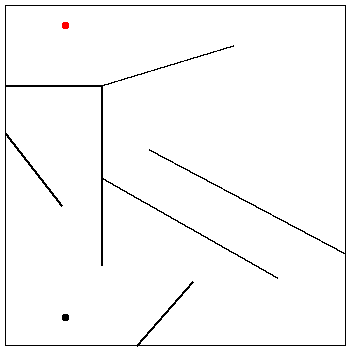

In [6]:
hardMaze = {
    'dimensions': (8.5, 8.5),

    'obstacles': [[(0.0, 2.0), (2.4, 2.0)], [(2.4, 2.0), (5.7, 1.0)],
                  [(2.4, 2.0), (2.4, 6.5)], [(0.0, 3.2), (1.4, 5.0)],
                  [(2.4, 4.3), (6.8, 6.8)], [(3.3, 8.5), (4.7, 6.9)],
                  [(3.6, 3.6), (8.5, 6.2)]],
   
    'position': (1.5, 7.8),
    'heading': 0,
    'goal': (1.5, 0.5),
}

showmaze(hardMaze,0)

# NEW MAZE ENVIRONMENT
In order to test the feasibility of my experiment I just created a simple maze environment which looks similar to hardmaze but the goal is placed in between lines to test whether it follows the path or not.

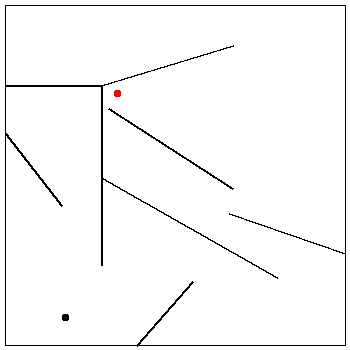

In [7]:
testmaze = {
    'dimensions': (8.5, 8.5),

    'obstacles': [[(0.0, 2.0), (2.4, 2.0)], [(2.4, 2.0), (5.7, 1.0)],
                  [(2.4, 2.0), (2.4, 6.5)], [(0.0, 3.2), (1.4, 5.0)],
                  [(2.4, 4.3), (6.8, 6.8)], [(3.3, 8.5), (4.7, 6.9)],
                  [(5.6, 5.2), (8.5, 6.2)], [(5.7,4.6), (2.6,2.6)]],
   
    'position': (1.5, 7.8),
    'heading': 0,
    'goal': (2.8, 2.2),
}

showmaze(testmaze,0)

In [8]:
def runSimulation(initState, controller, render=True):
    state = copy.copy(initState)
    timestep = 0

    # add the 4 edges as pseudo-obstacles,
    # and cache the shapely.geometry.LineString versions, since obstacles don't move
    obstacles = [LineString(obstacle) for obstacle in state['obstacles']]
    (width, height) = state['dimensions']
    obstacles += [LineString([(0.0, 0.0), (width, 0.0)]),
                LineString([(0.0, 0.0), (0.0, height)]),
                LineString([(width, 0.0), (width, height)]),
                LineString([(0.0, height), (width, height)])]
    maxDist = math.sqrt(width**2 + height**2) # max distance between points in the maze

    # print("Initial state:")
    showmaze(state,timestep) if render else None
    # print(state['position'])
    
    while not isGoal(state) and timestep < timeout:
    # bookkeeping and state vis
        timestep += 1
        if (timestep % visInterval == 0 or timestep == 399) and render:
            print(f"Step {timestep}:")
            showmaze(state, timestep)

        # update sensors
        # six range sensors, angled (in order): left, left-center, center, right-center, right, back
        rangeSensorDirections = [-math.pi/2, -math.pi/4, 0, math.pi/4, math.pi/2, math.pi]
        rangeSensors = [rangeSensor(state['position'], newHeading(state['heading'], direction), obstacles, maxDist)
                        for direction in rangeSensorDirections]
        # wedge sensor, as a 4-element one-hot encoding
        # angleToGoal is relative to heading, normalized to [0, 2pi], where 0 is forward
        angleToGoal = (math.atan2(state['goal'][1] - state['position'][1], state['goal'][0] - state['position'][0]) - state['heading']) % (math.pi * 2.0)
        if 0.25*math.pi < angleToGoal <= 0.75*math.pi:   # right
            wedgeSensors = [0.0, 0.0, 1.0, 0.0]
        elif 0.75*math.pi < angleToGoal <= 1.25*math.pi: # rear
            wedgeSensors = [0.0, 0.0, 0.0, 1.0]
        elif 1.25*math.pi < angleToGoal <= 1.75*math.pi: # left
            wedgeSensors = [1.0, 0.0, 0.0, 0.0]
        else:                                            # forward
            wedgeSensors = [0.0, 1.0, 0.0, 0.0]
        rangeSensors = [r / maxDist for r in rangeSensors]
        sensors = rangeSensors + wedgeSensors

#         if timestep == 1:
#             print(sensors)
#             print(controller(sensors))
#             import time; time.sleep(2)

        # query the controller
        (forwardBack, leftRight) = controller(sensors)
        movement = forwardBack * speed
        state['heading'] = newHeading(state['heading'], leftRight * math.pi)

        # collision detection and position updating:
        # since we only have a point agent and line-segment obstacles, we can skip a
        #   'real' physics engine and just look for whether our path on the next
        #   timestep would intersect an obstacle
        pos = state['position']
        if (movement >= 0.0):
            effectiveHeading = state['heading']
            effectiveMovement = movement
        else:
            effectiveHeading = newHeading(state['heading'], 2*math.pi)
            effectiveMovement = -movement
        distToCollision = rangeSensor(pos, effectiveHeading, obstacles, maxDist)
        if distToCollision <= effectiveMovement: # collision
          # bounce back epsilon from the collision point
            newpos = (pos[0] + math.cos(effectiveHeading) * (distToCollision - epsilon),
                    pos[1] + math.sin(effectiveHeading) * (distToCollision - epsilon))
        else:
            newpos = (pos[0] + math.cos(effectiveHeading) * effectiveMovement,
                    pos[1] + math.sin(effectiveHeading) * effectiveMovement)
        state['position'] = newpos

    if render:
        if isGoal(state):
            print(f"Goal reached in {timestep} steps:")
            showmaze(state, timestep)
        else:
            print(f"Timeout at {timestep} steps:")
            showmaze(state, timestep)
     
    # print(state['position'])
    return sqDistance(state['position'], state['goal']) #return distance to goal as fitness.


#what is fitness?
Fitness based EA uses proximity to an objective to determine fitness.

In [9]:
def fit_func(weights):
    network.update(weights)
    return runSimulation(testmaze, ANNcontroller, render=False)

In [10]:
from tqdm import tqdm
def test_solver(solver):
    history = {}
    history['best'] = []
    
    for j in tqdm(range(solver.MAX_ITERATION)):
        print(f"{j} - Test")
        solutions = solver.ask()
        fitness_list = np.zeros(solver.popsize)

        for i in range(solver.popsize):
            fitness_list[i] = fit_func(solutions[i])

        solver.tell(fitness_list)
        result = solver.result() # first element is the best solution, second element is the best fitness
        history['best'].append(result[1])
        history[j] = fitness_list

        if (j+1) % 1 == 0:
            print("fitness at iteration", (j+1), result[1])

    print("local optimum discovered by solver:\n", result[0])
    print("fitness score at this local optimum:", result[1])
    return history

#NETWORK TOPOLOGY 
In order to test the Evolutionary algorithm domain we have created a numpy neural network which consists of two hidden layers and one output layer which is seggrigated to two parts-> forward/backward movement and left/right movement.

Inputs:- The input to the sensors are the RANGE FINDER SENSORS which indicates the distance to the closest obstacle in that direction. The robot has four pie sensors that acts as a compass towards the goal.



In [11]:
import numpy as np
class NumpyNetwork:
    def __init__(self, sensorShape, hidden1, hidden2, output, activation=np.tanh):
        # N is batch size; D_in is input dimension;
        # H is hidden dimensions; D_out is output dimension.
        self.D_in = sensorShape
        self.H1 = hidden1
        self.H2 = hidden2
        self.D_out = output

        # Randomly initialize weights
        self.w1 = np.random.randn(self.D_in, self.H1)
        self.w2 = np.random.randn(self.H1, self.H2)
        self.w3 = np.random.randn(self.H2, self.D_out)
        
        self.activation = activation
        
        self.nParams = self.D_in * self.H1 + self.H1 * self.H2 + self.H2 * self.D_out

    def __call__(self, sensors):
        sensors = np.array(sensors)
        _h1 = sensors.dot(self.w1)
        h1 = self.activation(_h1)
        _h2 = h1.dot(self.w2)
        h2 = self.activation(_h2)
        return self.activation(h2.dot(self.w3))
    
    def update(self, newWeights):
        """Update weights of this network to a new set of (1D) passed-in weights"""
        
        assert(len(newWeights) == self.nParams)
        
        # get matrix sizes
        firstmatrix = self.D_in * self.H1
        secondmatrix = firstmatrix + self.H1 * self.H2
        thirdmatrix = secondmatrix + self.H2 * self.D_out
        
        # extract weights
        w1 = newWeights[:firstmatrix]
        w2 = newWeights[firstmatrix:secondmatrix]
        w3 = newWeights[secondmatrix:thirdmatrix]
        
        # update matrices 
        self.w1 = np.reshape(w1, self.w1.shape)
        self.w2 = np.reshape(w2, self.w2.shape)
        self.w3 = np.reshape(w3, self.w3.shape)

def ANNcontroller(sensors):
    return network(sensors)        

# EVOLUTION ALGORITHMS
In order to test the how well the Robot moves towards the desired goal few algorithms are added to test the robot movement feasibility.

#EVOLUTION STRATEGIES
Are the sub-class of nature-inspired direct search (and optimization) methods belonging to the class of Evolutionary Algorithms (EAs) which use mutation, recombination, and selection applied to a population of individuals containing candidate solutions in order to evolve iteratively better and better solution.

#SIMPLE GENETIC ALGORITHM
This is the process of natural selection process based on survival of the fittest. The process in nature that makes the best individuals survive. Those fittest individuals then mate with each other, giving rise to a new generation. The new generation is a mix of good and bad individuals , this process continues until the final suitable goal is reached with fittest individual among the population.

# COVARIANCE MATRIX ADAPTATION EVOLUTION STRATEGIES
It is an efficient derivative-free optimization algorithm. It optimizes a black-box objective function over a well-defined parameter space in which feature functions are often defined manually. Therefore, the performance of those techniques strongly depends on the quality of the chosen features or the underlying parametric function space.  


In [12]:
# from EvolutionStrategy import ES
import numpy as np

class ES:
    def __init__(self, popsize, nParams, eliteRatio=0.1, max_iter=5000):
        
        self.popsize = popsize
        self.nParams = nParams
        self.population = np.random.randn(popsize, nParams)
        
        self.eliteRatio = eliteRatio
        self.nElites = int(popsize * eliteRatio)
        self.elites = np.zeros((self.nElites, nParams))
        self.eliteRewards = np.zeros(self.nElites)
        
        self.bestParams = None
        self.bestReward = np.inf
        
        self.firstPass = True
        
        self.MAX_ITERATION = max_iter
        
    
    def ask(self):
        
        population = []
        for i in range(self.popsize):
            population.append(self.__mutateFromElites())
        
        self.population = np.array(population)
        return population
    
    def tell(self, reward_list):
        assert(len(reward_list) == self.popsize)
        
        reward_list = np.array(reward_list)
        
        if self.firstPass:
            rewards = reward_list
            solutions = self.population
        else:
            rewards = np.concatenate([reward_list, self.eliteRewards])
            solutions = np.concatenate([self.population, self.elites])
        
        next_gen_ids = np.argsort(rewards)[0:self.nElites]
        # sort in increasing order, then slice to keep the best k. 
        # we want to minimize the distance to the goal.
        
        
        self.elites = solutions[next_gen_ids]
        self.eliteRewards = rewards[next_gen_ids]
        
        self.curr_best_reward = self.eliteRewards[0]
        
        # print(self.curr_best_reward, self.bestReward)
        
        if (self.curr_best_reward < self.bestReward) or self.firstPass:
            self.firstPass = False
            self.bestReward = self.curr_best_reward
            self.bestParams = self.elites[0]
        
        return 
    
    def result(self):
        return self.bestParams, self.bestReward, self.curr_best_reward
    
    def __mutateFromElites(self):
        ids = self.elites.shape[0]
        parent = self.elites[np.random.choice(range(ids))]
        child = parent + np.random.randn(self.nParams)
        return child

# from HaGA import SimpleGA
import numpy as np

class SimpleGA:
    '''Simple Genetic Algorithm.'''
    def __init__(self, num_params,      # number of model parameters
               sigma_init=0.1,        # initial standard deviation
               sigma_decay=0.999,     # anneal standard deviation
               sigma_limit=0.01,      # stop annealing if less than this
               popsize=256,           # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.01,     # weight decay coefficient
              ):

        self.num_params = num_params
        self.sigma_init = sigma_init
        self.sigma_decay = sigma_decay
        self.sigma_limit = sigma_limit
        self.popsize = popsize

        self.elite_ratio = elite_ratio
        self.elite_popsize = int(self.popsize * self.elite_ratio)

        self.sigma = self.sigma_init
        self.elite_params = np.zeros((self.elite_popsize, self.num_params))
        self.elite_rewards = np.zeros(self.elite_popsize)
        self.best_param = np.zeros(self.num_params)
        self.best_reward = 0
        self.first_iteration = True
        self.forget_best = forget_best
        self.weight_decay = weight_decay

    def rms_stdev(self):
        return self.sigma # same sigma for all parameters.

    def ask(self):
        '''returns a list of parameters'''
        self.epsilon = np.random.randn(self.popsize, self.num_params) * self.sigma
        solutions = []

        def mate(a, b):
            c = np.copy(a)
            idx = np.where(np.random.rand((c.size)) > 0.5)
            c[idx] = b[idx]
            return c

        elite_range = range(self.elite_popsize)
        
        for i in range(self.popsize):
            idx_a = np.random.choice(elite_range)
            idx_b = np.random.choice(elite_range)
            child_params = mate(self.elite_params[idx_a], self.elite_params[idx_b])
            solutions.append(child_params + self.epsilon[i])

        solutions = np.array(solutions)
        self.solutions = solutions

        return solutions

    def tell(self, reward_table_result):
    # input must be a numpy float array
        assert(len(reward_table_result) == self.popsize), "Inconsistent reward_table size reported."
    
        reward_table = np.array(reward_table_result)
    
        # if self.weight_decay > 0:
        #     l2_decay = compute_weight_decay(self.weight_decay, self.solutions)
        #     reward_table += l2_decay

        if self.forget_best or self.first_iteration:
            reward = reward_table
            solution = self.solutions
        else:
            reward = np.concatenate([reward_table, self.elite_rewards])
            solution = np.concatenate([self.solutions, self.elite_params])

        idx = np.argsort(reward)[0:self.elite_popsize]

        self.elite_rewards = reward[idx]
        self.elite_params = solution[idx]

        self.curr_best_reward = self.elite_rewards[0]
    
        if self.first_iteration or (self.curr_best_reward < self.best_reward):
            self.first_iteration = False
            self.best_reward = self.elite_rewards[0]
            self.best_param = np.copy(self.elite_params[0])

        if (self.sigma > self.sigma_limit):
            self.sigma *= self.sigma_decay

    def current_param(self):
        return self.elite_params[0]

    def set_mu(self, mu):
        pass

    def best_param(self):
        return self.best_param

    def result(self): # return best params so far, along with historically best reward, curr reward, sigma
        return (self.best_param, self.best_reward, self.curr_best_reward, self.sigma)


In [13]:
def compute_weight_decay(weight_decay, model_param_list):
  model_param_grid = np.array(model_param_list)
  return - weight_decay * np.mean(model_param_grid * model_param_grid, axis=1)


In [14]:
class CMAES:
  '''CMA-ES wrapper.'''
  def __init__(self, num_params,      # number of model parameters
               sigma_init=0.10,       # initial standard deviation
               popsize=255,           # population size
               weight_decay=0.01):    # weight decay coefficient

    self.num_params = num_params
    self.sigma_init = sigma_init
    self.popsize = popsize
    self.weight_decay = weight_decay
    self.solutions = None

    import cma
    self.es = cma.CMAEvolutionStrategy( self.num_params * [0],
                                        self.sigma_init,
                                        {'popsize': self.popsize,
                                        })

  def rms_stdev(self):
    sigma = self.es.result[6]
    return np.mean(np.sqrt(sigma*sigma))

  def ask(self):
    '''returns a list of parameters'''
    self.solutions = np.array(self.es.ask())
    return self.solutions

  def tell(self, reward_table_result):
    reward_table = -np.array(reward_table_result)
    if self.weight_decay > 0:
      l2_decay = compute_weight_decay(self.weight_decay, self.solutions)
      reward_table += l2_decay
    self.es.tell(self.solutions, (reward_table).tolist()) # convert minimizer to maximizer.

  def current_param(self):
    return self.es.result[5] # mean solution, presumably better with noise

  def set_mu(self, mu):
    pass

  def best_param(self):
    return self.es.result[0] # best evaluated solution

  def result(self): # return best params so far, along with historically best reward, curr reward, sigma
    r = self.es.result
    return (r[0], -r[1], -r[1], r[6])


In [15]:
# Note: Because these variables are initialized to none, be sure to only run this code once (if wanting save data)
ESData = None
#pltESData = None
dfES = None

GAData = None
#pltGAData = None
dfGA = None

CMAESData = None
#pltCMAESData = None
dfCMAES = None

In [16]:
import pandas as pd

#Hardmaze

  0%|          | 0/50 [00:00<?, ?it/s]

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 17920 (seed=343429, Thu Dec 17 14:58:33 2020)
0 - Test


  2%|▏         | 1/50 [00:15<12:35, 15.42s/it]

fitness at iteration 1 28.530831144955474
1 - Test


  4%|▍         | 2/50 [00:30<12:13, 15.27s/it]

fitness at iteration 2 28.530831144955474
2 - Test


  6%|▌         | 3/50 [00:45<11:53, 15.19s/it]

fitness at iteration 3 28.530831144955474
3 - Test


  8%|▊         | 4/50 [01:00<11:37, 15.16s/it]

fitness at iteration 4 28.530831144955474
4 - Test


 10%|█         | 5/50 [01:15<11:19, 15.09s/it]

fitness at iteration 5 28.530831144955474
5 - Test


 12%|█▏        | 6/50 [01:30<11:03, 15.09s/it]

fitness at iteration 6 28.530831144955474
6 - Test


 14%|█▍        | 7/50 [01:45<10:47, 15.06s/it]

fitness at iteration 7 28.530831144955474
7 - Test


 16%|█▌        | 8/50 [02:00<10:31, 15.03s/it]

fitness at iteration 8 28.530831144955474
8 - Test


 18%|█▊        | 9/50 [02:15<10:14, 15.00s/it]

fitness at iteration 9 28.530831144955474
9 - Test


 20%|██        | 10/50 [02:30<09:58, 14.97s/it]

fitness at iteration 10 28.530831144955474
10 - Test


 22%|██▏       | 11/50 [02:45<09:43, 14.95s/it]

fitness at iteration 11 28.530831144955474
11 - Test


 24%|██▍       | 12/50 [03:00<09:29, 15.00s/it]

fitness at iteration 12 28.530831144955474
12 - Test


 26%|██▌       | 13/50 [03:15<09:13, 14.95s/it]

fitness at iteration 13 28.530831144955474
13 - Test


 28%|██▊       | 14/50 [03:30<08:59, 14.98s/it]

fitness at iteration 14 28.530831144955474
14 - Test


 30%|███       | 15/50 [03:44<08:40, 14.86s/it]

fitness at iteration 15 28.530831144955474
15 - Test


 32%|███▏      | 16/50 [03:59<08:25, 14.87s/it]

fitness at iteration 16 28.530831144955474
16 - Test


 34%|███▍      | 17/50 [04:14<08:11, 14.88s/it]

fitness at iteration 17 28.530831144955474
17 - Test


 36%|███▌      | 18/50 [04:29<07:57, 14.92s/it]

fitness at iteration 18 28.530831144955474
18 - Test


 38%|███▊      | 19/50 [04:44<07:42, 14.90s/it]

fitness at iteration 19 28.530831144955474
19 - Test


 40%|████      | 20/50 [04:59<07:25, 14.86s/it]

fitness at iteration 20 28.530831144955474
20 - Test


 42%|████▏     | 21/50 [05:14<07:11, 14.87s/it]

fitness at iteration 21 28.530831144955474
21 - Test


 44%|████▍     | 22/50 [05:28<06:55, 14.85s/it]

fitness at iteration 22 28.530831144955474
22 - Test


 46%|████▌     | 23/50 [05:44<06:48, 15.12s/it]

fitness at iteration 23 28.530831144955474
23 - Test


 48%|████▊     | 24/50 [06:00<06:40, 15.40s/it]

fitness at iteration 24 28.530831144955474
24 - Test


 50%|█████     | 25/50 [06:15<06:19, 15.18s/it]

fitness at iteration 25 28.530831144955474
25 - Test


 52%|█████▏    | 26/50 [06:29<06:00, 15.02s/it]

fitness at iteration 26 28.530831144955474
26 - Test


 54%|█████▍    | 27/50 [06:45<05:46, 15.05s/it]

fitness at iteration 27 28.530831144955474
27 - Test


 56%|█████▌    | 28/50 [06:59<05:29, 15.00s/it]

fitness at iteration 28 28.530831144955474
28 - Test


 58%|█████▊    | 29/50 [07:14<05:14, 14.96s/it]

fitness at iteration 29 28.530831144955474
29 - Test


 60%|██████    | 30/50 [07:30<05:01, 15.09s/it]

fitness at iteration 30 28.530831144955474
30 - Test


 62%|██████▏   | 31/50 [07:45<04:49, 15.24s/it]

fitness at iteration 31 28.530831144955474
31 - Test


 64%|██████▍   | 32/50 [08:00<04:32, 15.12s/it]

fitness at iteration 32 28.530831144955474
32 - Test


 66%|██████▌   | 33/50 [08:15<04:16, 15.07s/it]

fitness at iteration 33 28.530831144955474
33 - Test


 68%|██████▊   | 34/50 [08:30<03:58, 14.92s/it]

fitness at iteration 34 28.530831144955474
34 - Test


 70%|███████   | 35/50 [08:44<03:43, 14.88s/it]

fitness at iteration 35 28.530831144955474
35 - Test


 72%|███████▏  | 36/50 [08:59<03:27, 14.85s/it]

fitness at iteration 36 28.530831144955474
36 - Test


 74%|███████▍  | 37/50 [09:14<03:12, 14.84s/it]

fitness at iteration 37 28.530831144955474
37 - Test


 76%|███████▌  | 38/50 [09:29<02:57, 14.78s/it]

fitness at iteration 38 28.530831144955474
38 - Test


 78%|███████▊  | 39/50 [09:44<02:43, 14.89s/it]

fitness at iteration 39 28.530831144955474
39 - Test


 80%|████████  | 40/50 [09:59<02:28, 14.85s/it]

fitness at iteration 40 28.530831144955474
40 - Test


 82%|████████▏ | 41/50 [10:14<02:13, 14.88s/it]

fitness at iteration 41 28.530831144955474
41 - Test


 84%|████████▍ | 42/50 [10:28<01:59, 14.88s/it]

fitness at iteration 42 28.530831144955474
42 - Test


 86%|████████▌ | 43/50 [10:43<01:44, 14.90s/it]

fitness at iteration 43 28.530831144955474
43 - Test


 88%|████████▊ | 44/50 [10:58<01:29, 14.87s/it]

fitness at iteration 44 28.530831144955474
44 - Test


 90%|█████████ | 45/50 [11:13<01:14, 14.82s/it]

fitness at iteration 45 28.530831144955474
45 - Test


 92%|█████████▏| 46/50 [11:28<00:59, 14.78s/it]

fitness at iteration 46 28.530831144955474
46 - Test


 94%|█████████▍| 47/50 [11:43<00:44, 14.83s/it]

fitness at iteration 47 28.530831144955474
47 - Test


 96%|█████████▌| 48/50 [11:57<00:29, 14.84s/it]

fitness at iteration 48 28.530831144955474
48 - Test


 98%|█████████▊| 49/50 [12:12<00:14, 14.85s/it]

fitness at iteration 49 28.530831144955474
49 - Test


100%|██████████| 50/50 [12:27<00:00, 14.95s/it]

fitness at iteration 50 28.530831144955474
local optimum discovered by solver:
 [ 0.44419813  1.4572812  -0.66564275 ... -0.08182153 -0.19264623
 -1.90800578]
fitness score at this local optimum: 28.530831144955474
          0          1          2   ...         47         48         49
0  34.847616  32.961794  33.050000  ...  33.344432  33.028782  31.926214
1  28.530831  33.272953  35.067471  ...  31.757755  33.313347  33.050000
2  33.050444  33.025414  33.051198  ...  32.158541  33.050142  33.050000
3  33.050015  34.671705  33.046559  ...  35.235018  33.047996  38.946475
4  33.050003  33.050001  32.715740  ...  33.017345  31.451084  31.869580
5  32.839921  33.054247  33.050000  ...  38.074656  33.047918  31.456253
6  41.321877  33.050000  32.872590  ...  38.299936  32.477631  38.024262
7  34.542182  33.046048  32.175699  ...  33.326105  33.070176  33.824890
8  33.268124  33.607971  33.050000  ...  33.043920  33.049941  34.558709
9  32.304201  38.802014  32.594771  ...  33.379788  33.

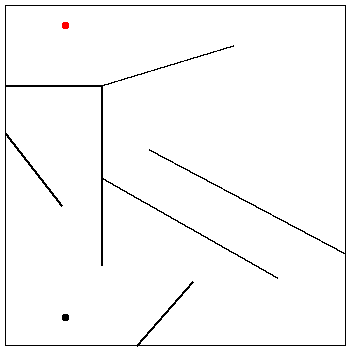

Step 20:


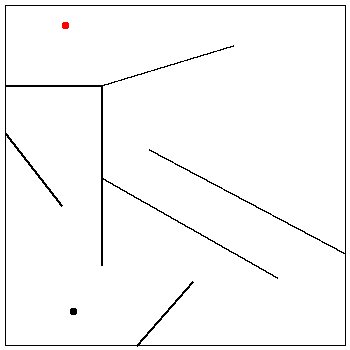

Step 40:


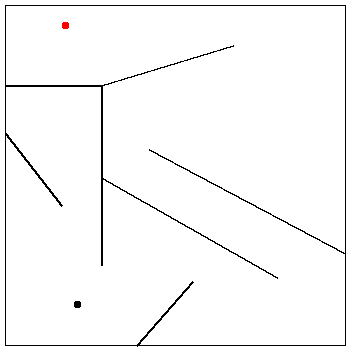

Step 60:


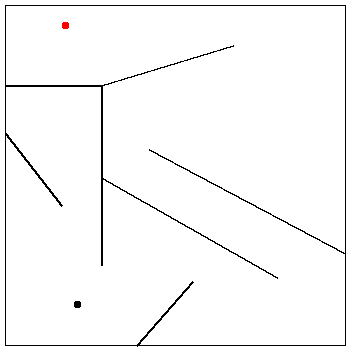

Step 80:


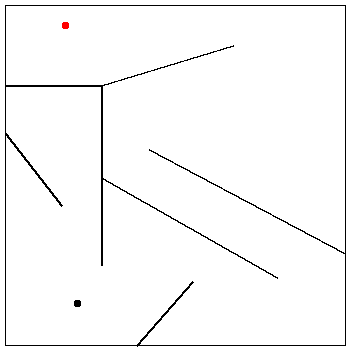

Step 100:


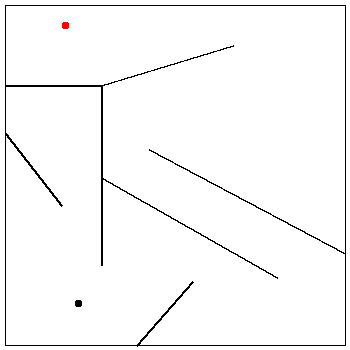

Step 120:


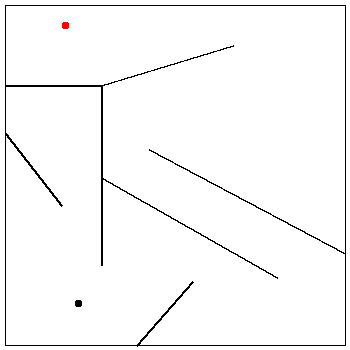

Step 140:


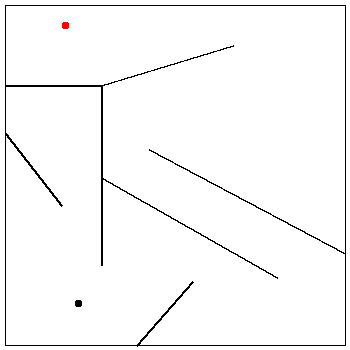

Step 160:


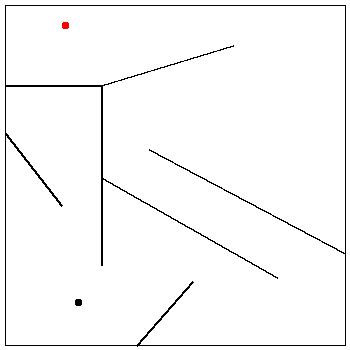

Step 180:


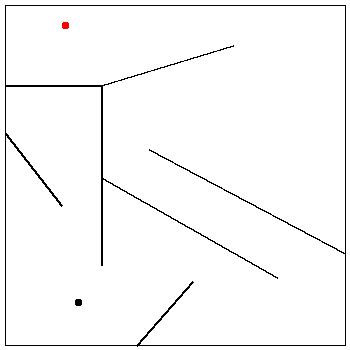

Step 200:


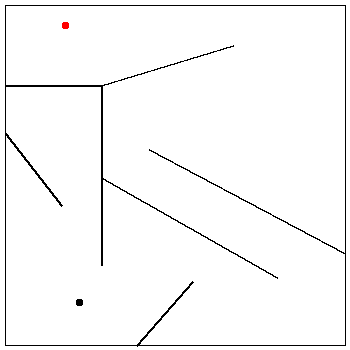

Step 220:


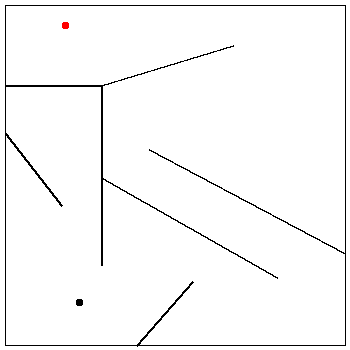

Step 240:


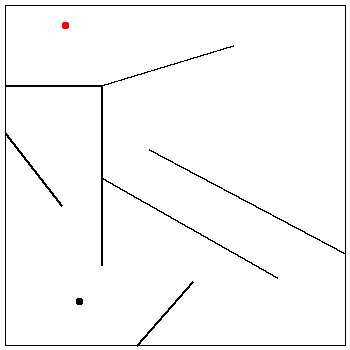

Step 260:


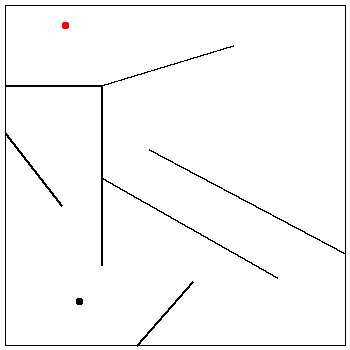

Step 280:


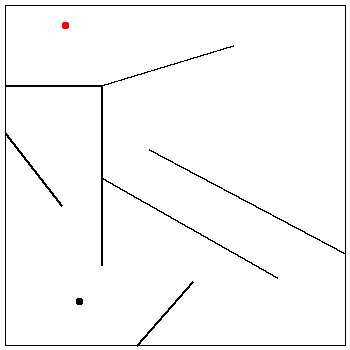

Step 300:


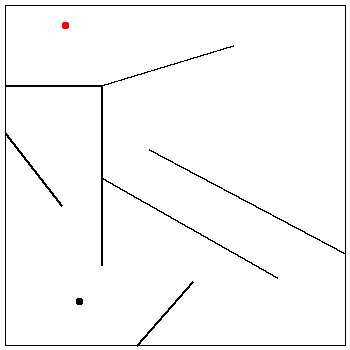

Step 320:


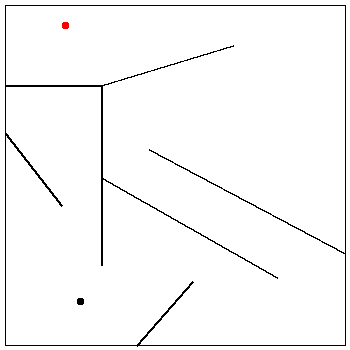

Step 340:


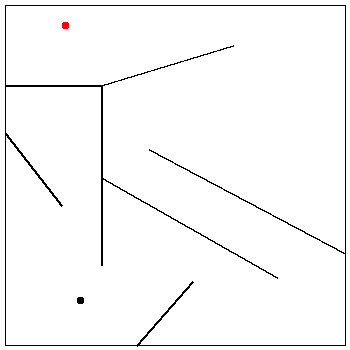

Step 360:


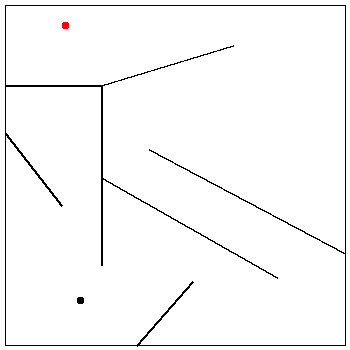

Step 380:


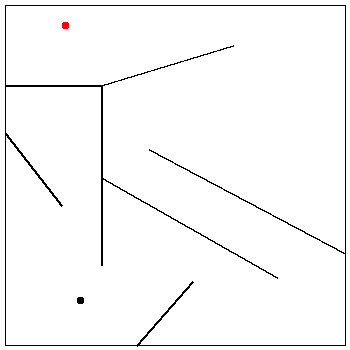

Step 399:


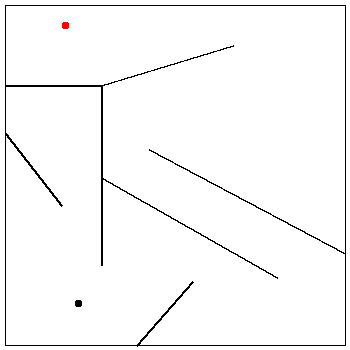

Step 400:


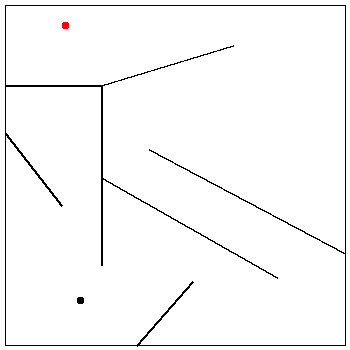

Timeout at 400 steps:


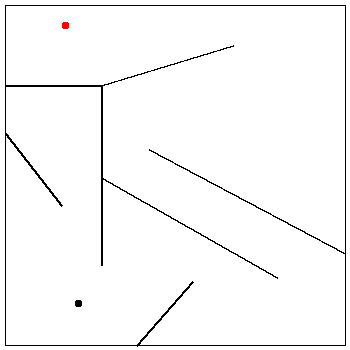

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:15<12:53, 15.79s/it]

fitness at iteration 1 14.636110721079783
1 - Test


  4%|▍         | 2/50 [00:32<12:50, 16.06s/it]

fitness at iteration 2 0.2427856768860095
2 - Test


  6%|▌         | 3/50 [00:48<12:32, 16.02s/it]

fitness at iteration 3 0.2417379931838566
3 - Test


  8%|▊         | 4/50 [01:04<12:16, 16.02s/it]

fitness at iteration 4 0.16624629350116651
4 - Test


 10%|█         | 5/50 [01:20<12:08, 16.18s/it]

fitness at iteration 5 0.16624629350116651
5 - Test


 12%|█▏        | 6/50 [01:36<11:49, 16.13s/it]

fitness at iteration 6 0.16624629350116651
6 - Test


 14%|█▍        | 7/50 [01:53<11:32, 16.10s/it]

fitness at iteration 7 0.16624629350116651
7 - Test


 16%|█▌        | 8/50 [02:08<11:13, 16.04s/it]

fitness at iteration 8 0.16624629350116651
8 - Test


 18%|█▊        | 9/50 [02:25<10:58, 16.07s/it]

fitness at iteration 9 0.16624629350116651
9 - Test


 20%|██        | 10/50 [02:41<10:45, 16.14s/it]

fitness at iteration 10 0.1615578289509239
10 - Test


 22%|██▏       | 11/50 [02:57<10:30, 16.17s/it]

fitness at iteration 11 0.1615578289509239
11 - Test


 24%|██▍       | 12/50 [03:14<10:17, 16.26s/it]

fitness at iteration 12 0.1615578289509239
12 - Test


 26%|██▌       | 13/50 [03:30<09:59, 16.21s/it]

fitness at iteration 13 0.1615578289509239
13 - Test


 28%|██▊       | 14/50 [03:46<09:43, 16.21s/it]

fitness at iteration 14 0.1615578289509239
14 - Test


 30%|███       | 15/50 [04:02<09:26, 16.17s/it]

fitness at iteration 15 0.1615578289509239
15 - Test


 32%|███▏      | 16/50 [04:18<09:09, 16.16s/it]

fitness at iteration 16 0.1615578289509239
16 - Test


 34%|███▍      | 17/50 [04:34<08:52, 16.14s/it]

fitness at iteration 17 0.1615578289509239
17 - Test


 36%|███▌      | 18/50 [04:50<08:36, 16.13s/it]

fitness at iteration 18 0.1615578289509239
18 - Test


 38%|███▊      | 19/50 [05:06<08:19, 16.12s/it]

fitness at iteration 19 0.1225893197572862
19 - Test


 40%|████      | 20/50 [05:22<08:03, 16.10s/it]

fitness at iteration 20 0.1225893197572862
20 - Test


 42%|████▏     | 21/50 [05:39<07:50, 16.22s/it]

fitness at iteration 21 0.1225893197572862
21 - Test


 44%|████▍     | 22/50 [05:55<07:29, 16.06s/it]

fitness at iteration 22 0.1225893197572862
22 - Test


 46%|████▌     | 23/50 [06:11<07:13, 16.07s/it]

fitness at iteration 23 0.1225893197572862
23 - Test


 48%|████▊     | 24/50 [06:27<06:59, 16.12s/it]

fitness at iteration 24 0.1225893197572862
24 - Test


 50%|█████     | 25/50 [06:43<06:43, 16.12s/it]

fitness at iteration 25 0.1225893197572862
25 - Test


 52%|█████▏    | 26/50 [06:59<06:24, 16.04s/it]

fitness at iteration 26 0.1225893197572862
26 - Test


 54%|█████▍    | 27/50 [07:15<06:07, 15.99s/it]

fitness at iteration 27 0.1225893197572862
27 - Test


 56%|█████▌    | 28/50 [07:31<05:53, 16.09s/it]

fitness at iteration 28 0.1225893197572862
28 - Test


 58%|█████▊    | 29/50 [07:47<05:36, 16.02s/it]

fitness at iteration 29 0.1225893197572862
29 - Test


 60%|██████    | 30/50 [08:03<05:21, 16.08s/it]

fitness at iteration 30 0.1225893197572862
30 - Test


 62%|██████▏   | 31/50 [08:19<05:05, 16.07s/it]

fitness at iteration 31 0.1225893197572862
31 - Test


 64%|██████▍   | 32/50 [08:36<04:50, 16.13s/it]

fitness at iteration 32 0.1225893197572862
32 - Test


 66%|██████▌   | 33/50 [08:51<04:33, 16.08s/it]

fitness at iteration 33 0.1225893197572862
33 - Test


 68%|██████▊   | 34/50 [09:08<04:17, 16.09s/it]

fitness at iteration 34 0.1225893197572862
34 - Test


 70%|███████   | 35/50 [09:24<04:01, 16.11s/it]

fitness at iteration 35 0.1225893197572862
35 - Test


 72%|███████▏  | 36/50 [09:40<03:44, 16.02s/it]

fitness at iteration 36 0.1225893197572862
36 - Test


 74%|███████▍  | 37/50 [09:56<03:28, 16.06s/it]

fitness at iteration 37 0.1225893197572862
37 - Test


 76%|███████▌  | 38/50 [10:12<03:12, 16.00s/it]

fitness at iteration 38 0.1225893197572862
38 - Test


 78%|███████▊  | 39/50 [10:28<02:56, 16.03s/it]

fitness at iteration 39 0.1225893197572862
39 - Test


 80%|████████  | 40/50 [10:44<02:40, 16.05s/it]

fitness at iteration 40 0.1225893197572862
40 - Test


 82%|████████▏ | 41/50 [11:00<02:25, 16.18s/it]

fitness at iteration 41 0.1225893197572862
41 - Test


 84%|████████▍ | 42/50 [11:16<02:09, 16.19s/it]

fitness at iteration 42 0.1225893197572862
42 - Test


 86%|████████▌ | 43/50 [11:32<01:52, 16.08s/it]

fitness at iteration 43 0.1225893197572862
43 - Test


 88%|████████▊ | 44/50 [11:48<01:36, 16.04s/it]

fitness at iteration 44 0.1225893197572862
44 - Test


 90%|█████████ | 45/50 [12:05<01:20, 16.13s/it]

fitness at iteration 45 0.1225893197572862
45 - Test


 92%|█████████▏| 46/50 [12:21<01:04, 16.06s/it]

fitness at iteration 46 0.1225893197572862
46 - Test


 94%|█████████▍| 47/50 [12:37<00:48, 16.15s/it]

fitness at iteration 47 0.1225893197572862
47 - Test


 96%|█████████▌| 48/50 [12:53<00:32, 16.09s/it]

fitness at iteration 48 0.1225893197572862
48 - Test


 98%|█████████▊| 49/50 [13:10<00:16, 16.28s/it]

fitness at iteration 49 0.1225893197572862
49 - Test


100%|██████████| 50/50 [13:26<00:00, 16.13s/it]

fitness at iteration 50 0.1225893197572862
local optimum discovered by solver:
 [-0.04283924  0.19948879  0.08354135 ...  0.20979956  0.03002748
 -0.12238888]
fitness score at this local optimum: 0.1225893197572862
          0          1          2   ...         47         48         49
0  17.492361  41.486498   8.078972  ...   8.759322  30.066452  37.701156
1  14.636111   6.791302  22.193412  ...  11.221979   0.181949  13.711405
2  39.844236  27.639053  36.835928  ...  17.410065  11.136921  18.357806
3  33.831804   0.242786   8.023549  ...  19.361885  26.642857  23.389506
4  43.782081  16.647572   0.241738  ...  20.926490   4.597674   9.605570
5  33.148150  26.852129   9.895120  ...  25.952072   8.999457   0.201469
6  39.970175  39.203968  36.644011  ...  31.866451  10.868557  25.726625
7  47.424253   8.110332  21.167257  ...   8.547772   8.877837   4.981455
8  24.294519  12.856412  13.170398  ...  19.539698   8.838973   8.019507
9  18.394948  11.009952  14.068662  ...   0.247354   8.

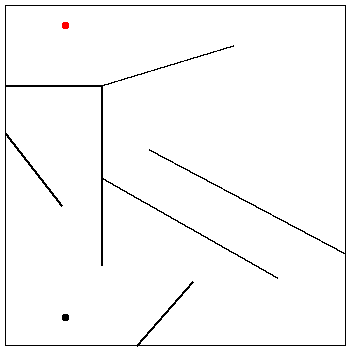

Step 20:


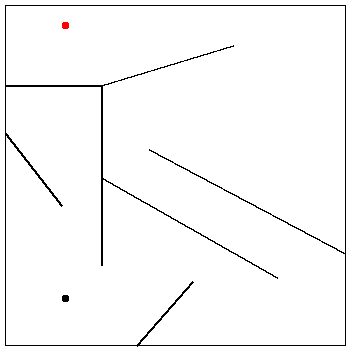

Step 40:


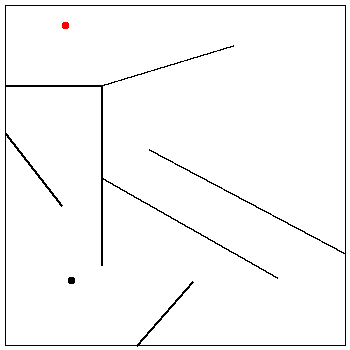

Step 60:


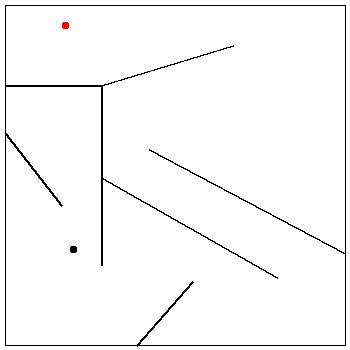

Step 80:


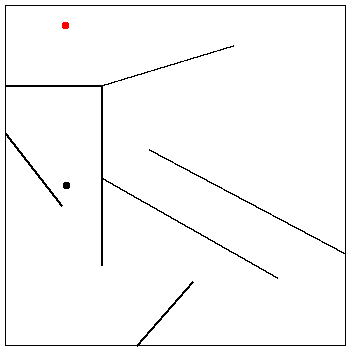

Step 100:


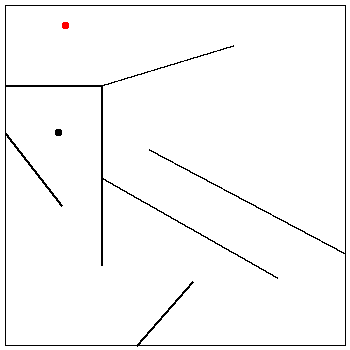

Step 120:


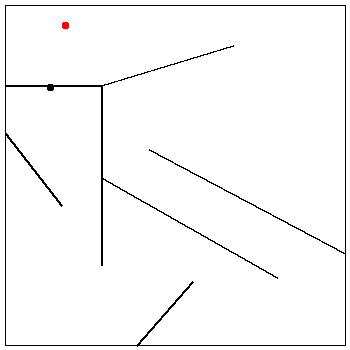

Step 140:


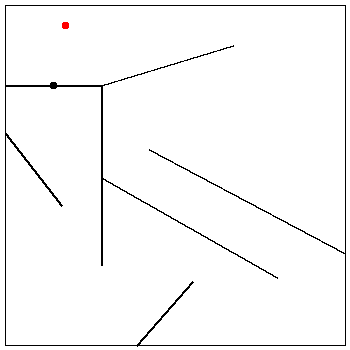

Step 160:


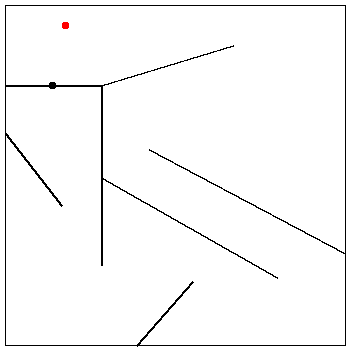

Step 180:


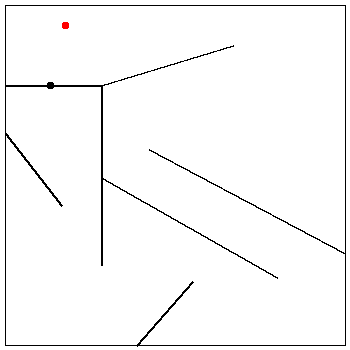

Step 200:


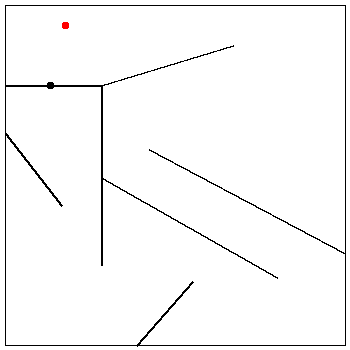

Step 220:


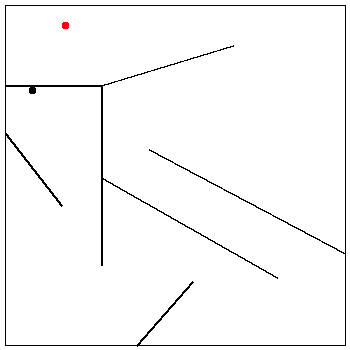

Step 240:


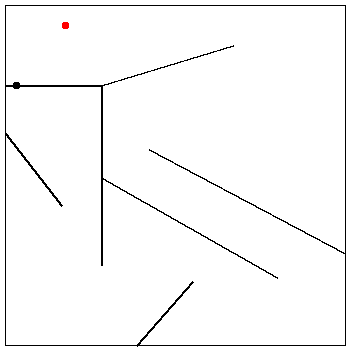

Step 260:


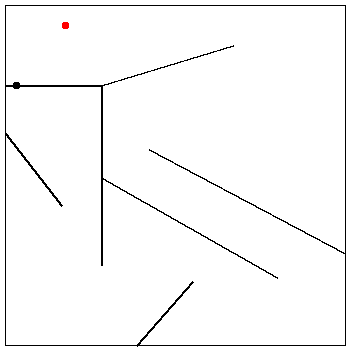

Step 280:


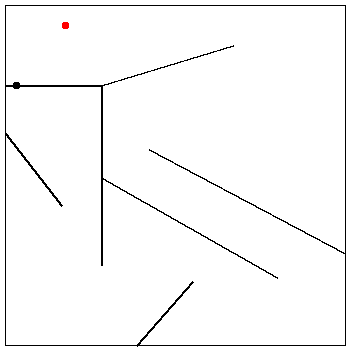

Step 300:


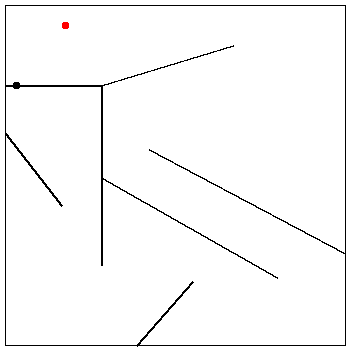

Step 320:


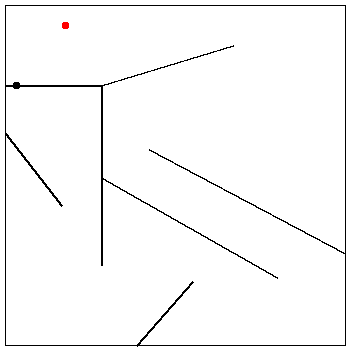

Step 340:


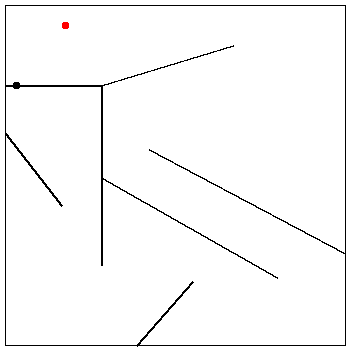

Step 360:


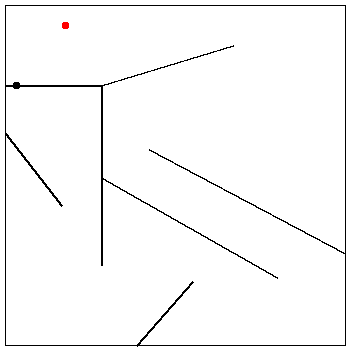

Step 380:


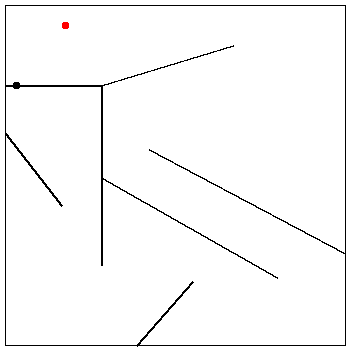

Step 399:


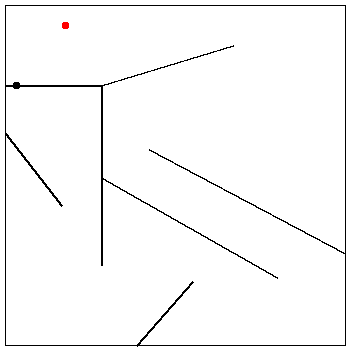

Step 400:


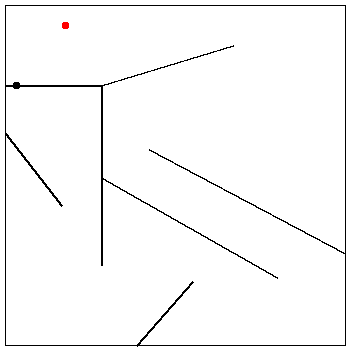

Timeout at 400 steps:


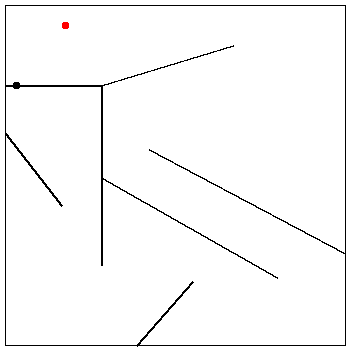

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:23<18:50, 23.07s/it]

fitness at iteration 1 41.640706266324855
1 - Test


  4%|▍         | 2/50 [00:43<17:45, 22.21s/it]

fitness at iteration 2 44.72175293486682
2 - Test


  6%|▌         | 3/50 [01:04<17:03, 21.79s/it]

fitness at iteration 3 44.72175293486682
3 - Test


  8%|▊         | 4/50 [01:24<16:17, 21.25s/it]

fitness at iteration 4 44.72175293486682
4 - Test


 10%|█         | 5/50 [01:44<15:38, 20.86s/it]

fitness at iteration 5 44.72175293486682
5 - Test


 12%|█▏        | 6/50 [02:03<15:03, 20.53s/it]

fitness at iteration 6 47.34751881492497
6 - Test


 14%|█▍        | 7/50 [02:24<14:44, 20.57s/it]

fitness at iteration 7 47.98318805356519
7 - Test


 16%|█▌        | 8/50 [02:45<14:24, 20.58s/it]

fitness at iteration 8 47.98318805356519
8 - Test


 18%|█▊        | 9/50 [03:05<13:56, 20.40s/it]

fitness at iteration 9 47.98318805356519
9 - Test


 20%|██        | 10/50 [03:24<13:30, 20.26s/it]

fitness at iteration 10 47.98318805356519
10 - Test


 22%|██▏       | 11/50 [03:45<13:07, 20.20s/it]

fitness at iteration 11 47.98318805356519
11 - Test


In [ ]:
  import matplotlib.pyplot as plt
  #%matplotlib inline
  from tqdm import tqdm
  import os
  import numpy as np
  from shapely.geometry import Point, LineString
  import copy

  if __name__ == "__main__":

    network = NumpyNetwork(10, 128, 128, 2)
    evoES = ES(popsize=10, nParams=network.nParams, max_iter=50)
    evoGA = SimpleGA(popsize=10, num_params=network.nParams)
    evoCMAES = CMAES(popsize=10,num_params=network.nParams)
    evoGA.MAX_ITERATION = 50
    evoCMAES.MAX_ITERATION = 50 
    controller = ANNcontroller
    maze = hardMaze

    ### Evolution Strategy Code
    if ESData == None:
      historyES = test_solver(evoES)
      ESData = historyES
      #pltESData = plt.plot(historyES['best'])
      dfES = pd.DataFrame.from_dict({i:historyES[i] for i in range(evoES.MAX_ITERATION)})
      print(dfES)
      network.update(evoES.bestParams)
      runSimulation(maze, controller, render=True)

    ### Genetic Alg Code
    if GAData == None:
      historyGA = test_solver(evoGA)
      GAData = historyGA
      #pltGAData = plt.plot(historyGA['best'])
      dfGA = pd.DataFrame.from_dict({i:historyGA[i] for i in range(evoGA.MAX_ITERATION)})
      print(dfGA)
      network.update(evoGA.best_param)
      runSimulation(maze, controller, render=True)

    ### CMA-ES Code
    if CMAESData == None:
      historyCMAES = test_solver(evoCMAES)
      CMAESData = historyCMAES
      dfCMAES = pd.DataFrame.from_dict({i:historyCMAES[i] for i in range(evoCMAES.MAX_ITERATION)})
      print(dfCMAES)
      network.update(evoCMAES.best_param())
      runSimulation(maze, controller, render=True)



    ##print
    print('Data Frame: ES')
    print(dfES)
    plt.plot(historyES['best'],color = "green")
    print('Data Frame: GA')
    print(dfGA)
    plt.plot(historyGA['best'], color="blue")
    print('Data Frame : CMAES')
    print(dfCMAES)
    plt.plot(historyCMAES['best'], color="red")

In [21]:
pip install cma

     |████████████████████████████████| 235kB 5.8MB/s 


#Hardmaze
In order to explain the variation of robots in different time steps I have ploted standard deviation graph which instantly help us to understand how far our robot is in search of our goal. 
best_iteration_hard_maze is the line I consider as a base to explain this.
->If you see ES_standard_deviation_hard_maze which is depicted in blue color it clearly shows that there is hardly any movement of robot towards the goal.
->Coming towards "GA_standard_deviation_hard_maze" which is depicted in green color shows that most of the times controller gets stuck in the dead end just below the goal which is also called as local optima and this happens because the controller is preoccupied getting closer to the goal and it keeps going up and up though it hits the wall.
-> Moving forward towrds"CMAES_standard_deviation_hard_maze" which is depicted in red color shows that the robot tries to explore the path but it gets lower fitness values and it gets killed up.

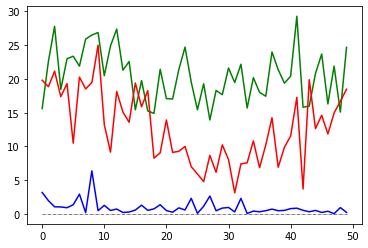

In [ ]:
MAX_ITERATION = 50 
best_iteration_hard_maze = [50] * MAX_ITERATION 
ES_standard_deviation_hard_maze= dfES.std()
GA_standard_deviation_hard_maze = dfGA.std()
CMAES_standard_deviation_hard_maze = dfCMAES.std()
plt.plot(best_iteration_hard_maze, color="black",linewidth=0.5, linestyle="-.")
plt.plot(ES_standard_deviation_hard_maze,color="blue")
plt.plot(GA_standard_deviation_hard_maze,color="green")
plt.plot(CMAES_standard_deviation_hard_maze,color="red")


In [ ]:
pip install cma

#medium maze 

  0%|          | 0/50 [00:00<?, ?it/s]

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 17920 (seed=292860, Thu Dec 17 05:15:37 2020)
0 - Test


  2%|▏         | 1/50 [00:13<11:13, 13.75s/it]

fitness at iteration 1 140.28005144169663
1 - Test


  4%|▍         | 2/50 [00:27<10:55, 13.65s/it]

fitness at iteration 2 140.28005144169663
2 - Test


  6%|▌         | 3/50 [00:40<10:42, 13.67s/it]

fitness at iteration 3 140.28005144169663
3 - Test


  8%|▊         | 4/50 [00:54<10:26, 13.62s/it]

fitness at iteration 4 137.90746907020056
4 - Test


 10%|█         | 5/50 [01:07<10:11, 13.60s/it]

fitness at iteration 5 137.90746907020056
5 - Test


 12%|█▏        | 6/50 [01:21<10:02, 13.70s/it]

fitness at iteration 6 137.90746907020056
6 - Test


 14%|█▍        | 7/50 [01:35<09:52, 13.78s/it]

fitness at iteration 7 137.90746907020056
7 - Test


 16%|█▌        | 8/50 [01:49<09:38, 13.77s/it]

fitness at iteration 8 137.90746907020056
8 - Test


 18%|█▊        | 9/50 [02:03<09:22, 13.72s/it]

fitness at iteration 9 137.90746907020056
9 - Test


 20%|██        | 10/50 [02:16<09:07, 13.68s/it]

fitness at iteration 10 137.90746907020056
10 - Test


 22%|██▏       | 11/50 [02:30<08:55, 13.74s/it]

fitness at iteration 11 137.90746907020056
11 - Test


 24%|██▍       | 12/50 [02:44<08:40, 13.71s/it]

fitness at iteration 12 137.90746907020056
12 - Test


 26%|██▌       | 13/50 [02:58<08:28, 13.74s/it]

fitness at iteration 13 137.90746907020056
13 - Test


 28%|██▊       | 14/50 [03:11<08:12, 13.69s/it]

fitness at iteration 14 137.90746907020056
14 - Test


 30%|███       | 15/50 [03:25<07:58, 13.66s/it]

fitness at iteration 15 137.90746907020056
15 - Test


 32%|███▏      | 16/50 [03:38<07:43, 13.63s/it]

fitness at iteration 16 137.90746907020056
16 - Test


 34%|███▍      | 17/50 [03:53<07:39, 13.91s/it]

fitness at iteration 17 137.90746907020056
17 - Test


 36%|███▌      | 18/50 [04:07<07:23, 13.87s/it]

fitness at iteration 18 137.90746907020056
18 - Test


 38%|███▊      | 19/50 [04:20<07:08, 13.83s/it]

fitness at iteration 19 137.90746907020056
19 - Test


 40%|████      | 20/50 [04:34<06:52, 13.76s/it]

fitness at iteration 20 137.90746907020056
20 - Test


 42%|████▏     | 21/50 [04:48<06:37, 13.69s/it]

fitness at iteration 21 137.90746907020056
21 - Test


 44%|████▍     | 22/50 [05:01<06:21, 13.62s/it]

fitness at iteration 22 137.90746907020056
22 - Test


 46%|████▌     | 23/50 [05:15<06:08, 13.63s/it]

fitness at iteration 23 137.90746907020056
23 - Test


 48%|████▊     | 24/50 [05:29<05:57, 13.74s/it]

fitness at iteration 24 137.90746907020056
24 - Test


 50%|█████     | 25/50 [05:43<05:44, 13.78s/it]

fitness at iteration 25 137.90746907020056
25 - Test


 52%|█████▏    | 26/50 [05:56<05:29, 13.73s/it]

fitness at iteration 26 137.90746907020056
26 - Test


 54%|█████▍    | 27/50 [06:10<05:16, 13.76s/it]

fitness at iteration 27 137.90746907020056
27 - Test


 56%|█████▌    | 28/50 [06:24<05:02, 13.76s/it]

fitness at iteration 28 137.90746907020056
28 - Test


 58%|█████▊    | 29/50 [06:37<04:48, 13.74s/it]

fitness at iteration 29 137.90746907020056
29 - Test


 60%|██████    | 30/50 [06:51<04:34, 13.75s/it]

fitness at iteration 30 137.90746907020056
30 - Test


 62%|██████▏   | 31/50 [07:05<04:21, 13.76s/it]

fitness at iteration 31 137.90746907020056
31 - Test


 64%|██████▍   | 32/50 [07:19<04:07, 13.75s/it]

fitness at iteration 32 116.11949355123798
32 - Test


 66%|██████▌   | 33/50 [07:32<03:53, 13.73s/it]

fitness at iteration 33 116.11949355123798
33 - Test


 68%|██████▊   | 34/50 [07:46<03:39, 13.70s/it]

fitness at iteration 34 116.11949355123798
34 - Test


 70%|███████   | 35/50 [08:00<03:25, 13.70s/it]

fitness at iteration 35 116.11949355123798
35 - Test


 72%|███████▏  | 36/50 [08:13<03:11, 13.71s/it]

fitness at iteration 36 116.11949355123798
36 - Test


 74%|███████▍  | 37/50 [08:27<02:57, 13.64s/it]

fitness at iteration 37 116.11949355123798
37 - Test


 76%|███████▌  | 38/50 [08:41<02:43, 13.63s/it]

fitness at iteration 38 116.11949355123798
38 - Test


 78%|███████▊  | 39/50 [08:54<02:29, 13.63s/it]

fitness at iteration 39 116.11949355123798
39 - Test


 80%|████████  | 40/50 [09:08<02:16, 13.68s/it]

fitness at iteration 40 116.11949355123798
40 - Test


 82%|████████▏ | 41/50 [09:22<02:03, 13.71s/it]

fitness at iteration 41 116.11949355123798
41 - Test


 84%|████████▍ | 42/50 [09:35<01:49, 13.67s/it]

fitness at iteration 42 116.11949355123798
42 - Test


 86%|████████▌ | 43/50 [09:49<01:35, 13.65s/it]

fitness at iteration 43 116.11949355123798
43 - Test


 88%|████████▊ | 44/50 [10:02<01:21, 13.63s/it]

fitness at iteration 44 116.11949355123798
44 - Test


 90%|█████████ | 45/50 [10:16<01:08, 13.63s/it]

fitness at iteration 45 116.11949355123798
45 - Test


 92%|█████████▏| 46/50 [10:30<00:54, 13.63s/it]

fitness at iteration 46 116.11949355123798
46 - Test


 94%|█████████▍| 47/50 [10:43<00:40, 13.65s/it]

fitness at iteration 47 116.11949355123798
47 - Test


 96%|█████████▌| 48/50 [10:57<00:27, 13.60s/it]

fitness at iteration 48 116.11949355123798
48 - Test


 98%|█████████▊| 49/50 [11:10<00:13, 13.58s/it]

fitness at iteration 49 116.11949355123798
49 - Test


100%|██████████| 50/50 [11:24<00:00, 13.69s/it]

fitness at iteration 50 116.11949355123798
local optimum discovered by solver:
 [-0.34072459 -1.42045267 -0.58418634 ...  0.26425789 -3.32648619
 -0.25458246]
fitness score at this local optimum: 116.11949355123798
           0           1           2   ...          47          48          49
0  183.103646  171.458810  161.692245  ...  171.460577  171.607590  171.460777
1  140.280051  171.424500  184.526770  ...  171.380799  171.460004  171.459917
2  171.528741  171.545953  171.471435  ...  171.460000  171.368106  173.059490
3  172.473535  190.693232  155.610869  ...  171.460000  146.763841  167.018354
4  164.232864  171.460113  183.338748  ...  192.444367  150.481645  171.460000
5  172.483396  182.666464  171.460000  ...  171.454176  171.329905  178.767979
6  172.357656  171.425472  172.675717  ...  165.032609  171.460001  171.460000
7  171.294324  171.453780  171.451357  ...  171.460001  171.460000  174.197006
8  169.451955  171.461077  177.568133  ...  171.464816  166.998948  194.78

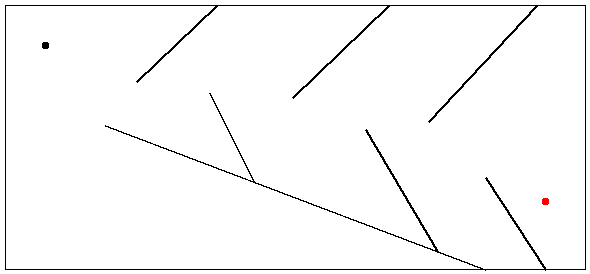

Step 20:


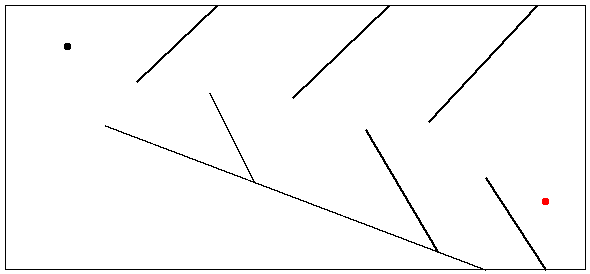

Step 40:


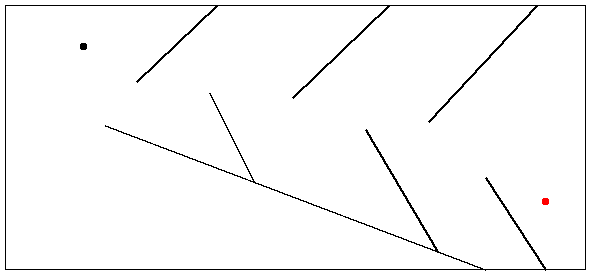

Step 60:


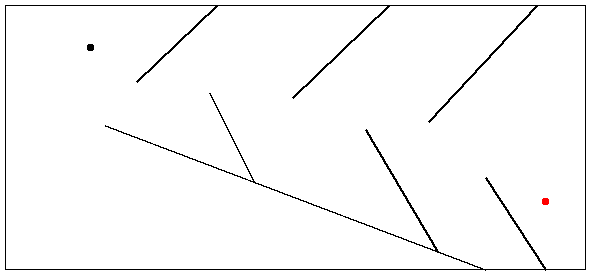

Step 80:


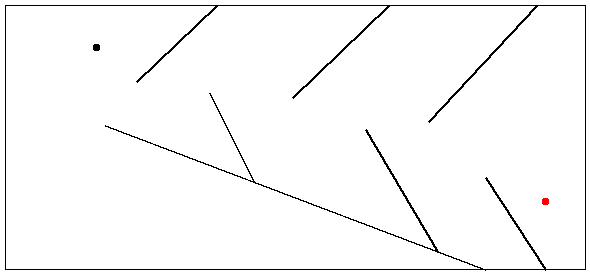

Step 100:


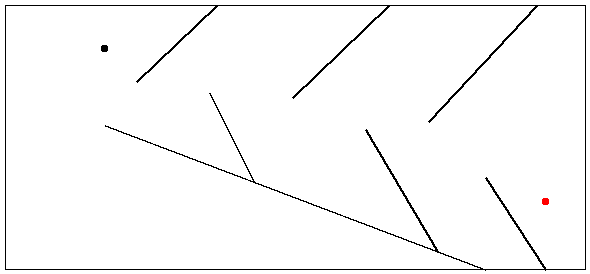

Step 120:


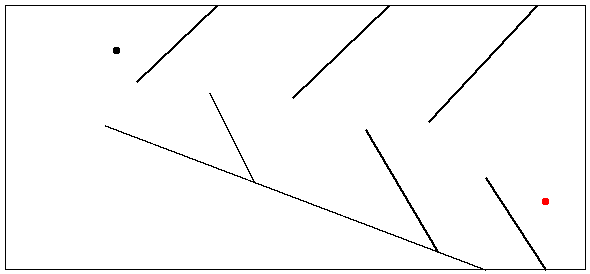

Step 140:


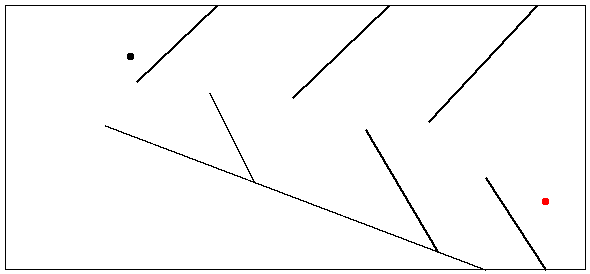

Step 160:


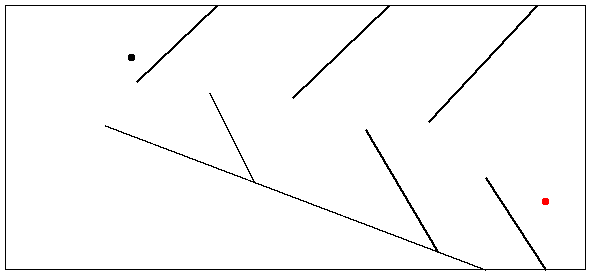

Step 180:


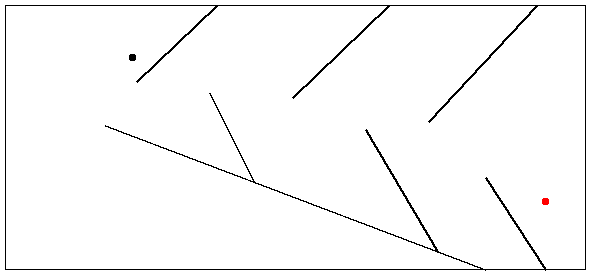

Step 200:


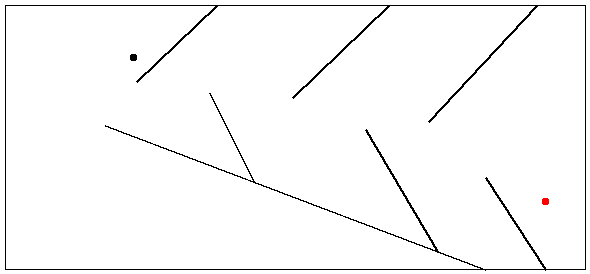

Step 220:


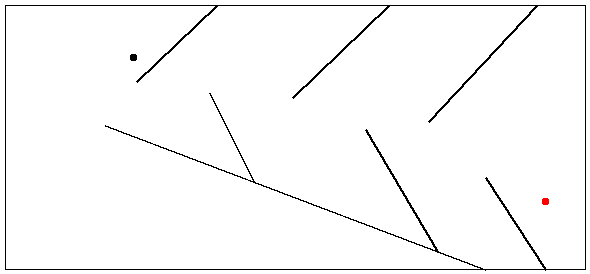

Step 240:


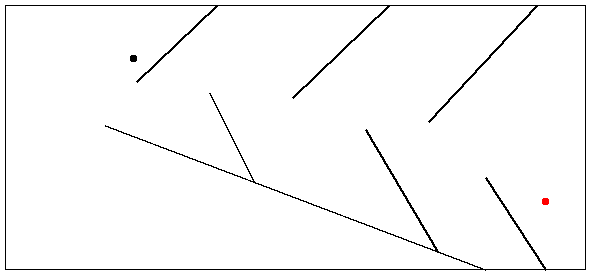

Step 260:


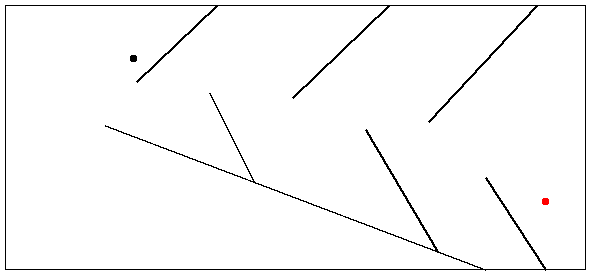

Step 280:


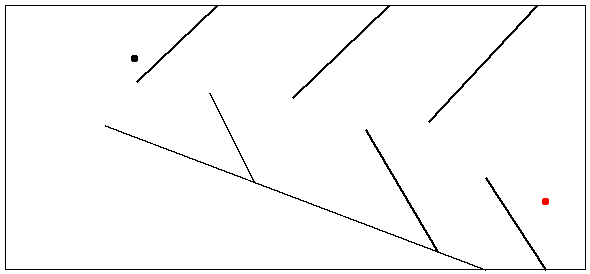

Step 300:


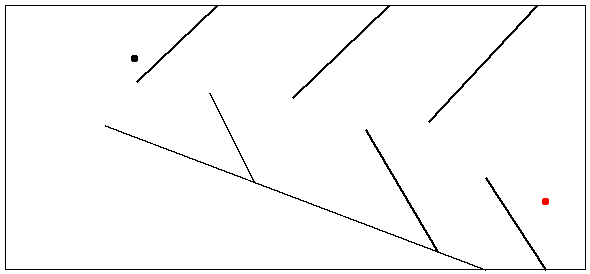

Step 320:


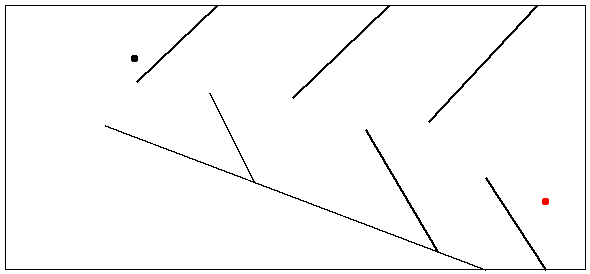

Step 340:


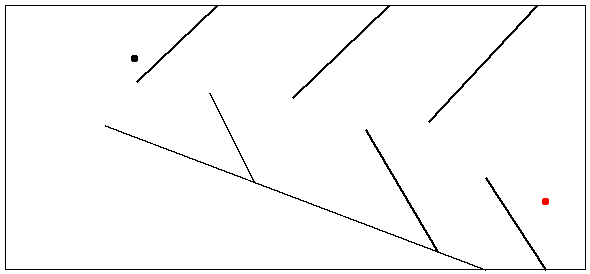

Step 360:


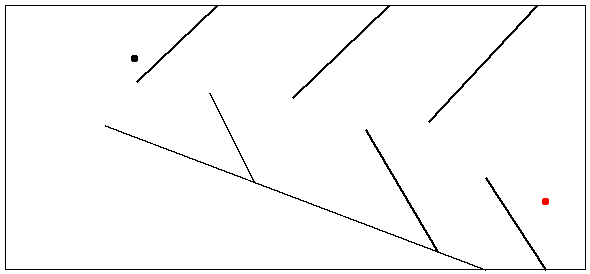

Step 380:


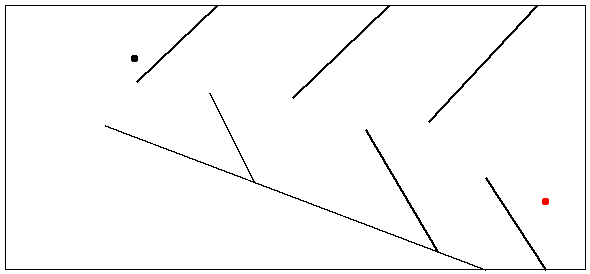

Step 399:


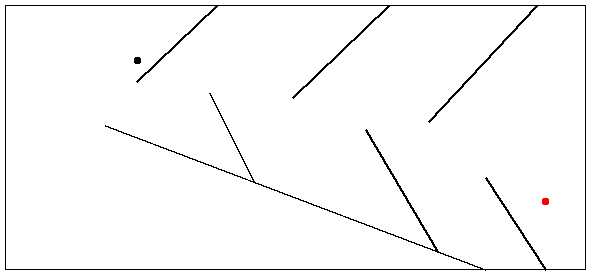

Step 400:


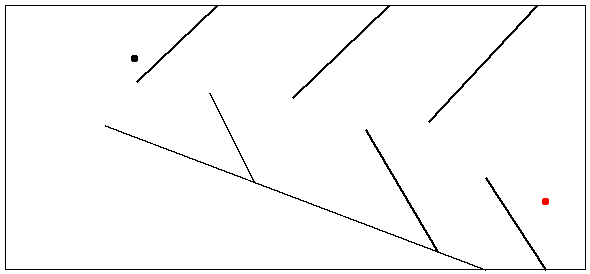

Timeout at 400 steps:


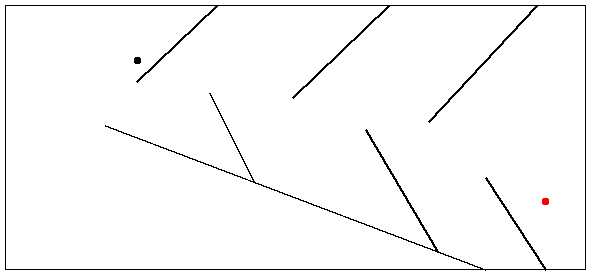

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:14<11:42, 14.33s/it]

fitness at iteration 1 77.5928391788655
1 - Test


  4%|▍         | 2/50 [00:28<11:25, 14.29s/it]

fitness at iteration 2 53.69660159610141
2 - Test


  6%|▌         | 3/50 [00:42<11:08, 14.22s/it]

fitness at iteration 3 39.028444377093365
3 - Test


  8%|▊         | 4/50 [00:57<11:04, 14.45s/it]

fitness at iteration 4 0.0005708574438767033
4 - Test


 10%|█         | 5/50 [01:12<10:51, 14.49s/it]

fitness at iteration 5 0.0005708574438767033
5 - Test


 12%|█▏        | 6/50 [01:26<10:39, 14.54s/it]

fitness at iteration 6 0.0005708574438767033
6 - Test


 14%|█▍        | 7/50 [01:41<10:29, 14.63s/it]

fitness at iteration 7 0.0005708574438767033
7 - Test


 16%|█▌        | 8/50 [01:56<10:11, 14.56s/it]

fitness at iteration 8 0.0005708574438767033
8 - Test


 18%|█▊        | 9/50 [02:10<09:59, 14.61s/it]

fitness at iteration 9 0.0005708574438767033
9 - Test


 20%|██        | 10/50 [02:25<09:46, 14.66s/it]

fitness at iteration 10 0.0005708574438767033
10 - Test


 22%|██▏       | 11/50 [02:39<09:26, 14.52s/it]

fitness at iteration 11 0.0005708574438767033
11 - Test


 24%|██▍       | 12/50 [02:53<09:04, 14.34s/it]

fitness at iteration 12 2.2926745106416745e-05
12 - Test


 26%|██▌       | 13/50 [03:08<08:53, 14.42s/it]

fitness at iteration 13 2.2926745106416745e-05
13 - Test


 28%|██▊       | 14/50 [03:22<08:39, 14.42s/it]

fitness at iteration 14 2.2926745106416745e-05
14 - Test


 30%|███       | 15/50 [03:37<08:29, 14.55s/it]

fitness at iteration 15 2.2926745106416745e-05
15 - Test


 32%|███▏      | 16/50 [03:51<08:13, 14.53s/it]

fitness at iteration 16 2.2926745106416745e-05
16 - Test


 34%|███▍      | 17/50 [04:06<07:58, 14.51s/it]

fitness at iteration 17 2.2926745106416745e-05
17 - Test


 36%|███▌      | 18/50 [04:21<07:46, 14.57s/it]

fitness at iteration 18 2.2926745106416745e-05
18 - Test


 38%|███▊      | 19/50 [04:35<07:28, 14.46s/it]

fitness at iteration 19 2.2926745106416745e-05
19 - Test


 40%|████      | 20/50 [04:49<07:14, 14.49s/it]

fitness at iteration 20 2.2926745106416745e-05
20 - Test


 42%|████▏     | 21/50 [05:04<06:57, 14.40s/it]

fitness at iteration 21 2.2926745106416745e-05
21 - Test


 44%|████▍     | 22/50 [05:18<06:45, 14.48s/it]

fitness at iteration 22 2.2926745106416745e-05
22 - Test


 46%|████▌     | 23/50 [05:33<06:31, 14.48s/it]

fitness at iteration 23 2.2926745106416745e-05
23 - Test


 48%|████▊     | 24/50 [05:47<06:17, 14.51s/it]

fitness at iteration 24 2.2926745106416745e-05
24 - Test


 50%|█████     | 25/50 [06:02<06:02, 14.51s/it]

fitness at iteration 25 2.2926745106416745e-05
25 - Test


 52%|█████▏    | 26/50 [06:16<05:48, 14.54s/it]

fitness at iteration 26 2.2926745106416745e-05
26 - Test


 54%|█████▍    | 27/50 [06:31<05:32, 14.47s/it]

fitness at iteration 27 2.2926745106416745e-05
27 - Test


 56%|█████▌    | 28/50 [06:46<05:21, 14.61s/it]

fitness at iteration 28 2.2926745106416745e-05
28 - Test


 58%|█████▊    | 29/50 [07:00<05:03, 14.45s/it]

fitness at iteration 29 2.2926745106416745e-05
29 - Test


 60%|██████    | 30/50 [07:15<04:50, 14.53s/it]

fitness at iteration 30 2.2926745106416745e-05
30 - Test


 62%|██████▏   | 31/50 [07:29<04:37, 14.60s/it]

fitness at iteration 31 2.2926745106416745e-05
31 - Test


 64%|██████▍   | 32/50 [07:44<04:23, 14.62s/it]

fitness at iteration 32 2.2926745106416745e-05
32 - Test


 66%|██████▌   | 33/50 [07:59<04:09, 14.65s/it]

fitness at iteration 33 2.2926745106416745e-05
33 - Test


 68%|██████▊   | 34/50 [08:13<03:54, 14.67s/it]

fitness at iteration 34 2.2926745106416745e-05
34 - Test


 70%|███████   | 35/50 [08:28<03:38, 14.58s/it]

fitness at iteration 35 2.2926745106416745e-05
35 - Test


 72%|███████▏  | 36/50 [08:42<03:22, 14.48s/it]

fitness at iteration 36 2.2926745106416745e-05
36 - Test


 74%|███████▍  | 37/50 [08:56<03:07, 14.42s/it]

fitness at iteration 37 2.2926745106416745e-05
37 - Test


 76%|███████▌  | 38/50 [09:11<02:53, 14.42s/it]

fitness at iteration 38 2.2926745106416745e-05
38 - Test


 78%|███████▊  | 39/50 [09:26<02:40, 14.56s/it]

fitness at iteration 39 2.2926745106416745e-05
39 - Test


 80%|████████  | 40/50 [09:40<02:25, 14.57s/it]

fitness at iteration 40 2.2926745106416745e-05
40 - Test


 82%|████████▏ | 41/50 [09:55<02:11, 14.57s/it]

fitness at iteration 41 2.2926745106416745e-05
41 - Test


 84%|████████▍ | 42/50 [10:10<01:57, 14.66s/it]

fitness at iteration 42 2.2926745106416745e-05
42 - Test


 86%|████████▌ | 43/50 [10:24<01:42, 14.69s/it]

fitness at iteration 43 2.2926745106416745e-05
43 - Test


 88%|████████▊ | 44/50 [10:39<01:28, 14.70s/it]

fitness at iteration 44 2.2926745106416745e-05
44 - Test


 90%|█████████ | 45/50 [10:54<01:13, 14.74s/it]

fitness at iteration 45 2.2926745106416745e-05
45 - Test


 92%|█████████▏| 46/50 [11:09<00:58, 14.71s/it]

fitness at iteration 46 2.2926745106416745e-05
46 - Test


 94%|█████████▍| 47/50 [11:23<00:43, 14.59s/it]

fitness at iteration 47 2.2926745106416745e-05
47 - Test


 96%|█████████▌| 48/50 [11:37<00:29, 14.55s/it]

fitness at iteration 48 2.2926745106416745e-05
48 - Test


 98%|█████████▊| 49/50 [11:52<00:14, 14.57s/it]

fitness at iteration 49 2.2926745106416745e-05
49 - Test


100%|██████████| 50/50 [12:07<00:00, 14.55s/it]

fitness at iteration 50 2.2926745106416745e-05
local optimum discovered by solver:
 [-0.02604293 -0.21639236 -0.18144308 ...  0.16980841  0.24614204
  0.37407082]
fitness score at this local optimum: 2.2926745106416745e-05
           0           1           2   ...          47          48          49
0  189.999310   53.696602  203.278528  ...   91.527754  192.567023  108.735629
1  125.293214   88.320610  187.110342  ...  186.798367   12.822503  205.795388
2  107.578047  198.802628  183.108720  ...  113.674269   93.542035   98.604925
3   77.592839  203.983558  109.505509  ...  100.297561  164.829466   11.610684
4  136.242505  205.459712  181.855654  ...   45.609191   92.402385    0.007128
5  155.341719  198.300803   39.028444  ...  146.656633  182.861219  179.605835
6  193.771237   66.583204  107.521335  ...   43.147186  134.842144  163.466916
7  138.785821  205.967345  204.208410  ...  145.459053  180.599160  181.995204
8   90.083108  205.914600  198.362897  ...   97.301230   91.581140

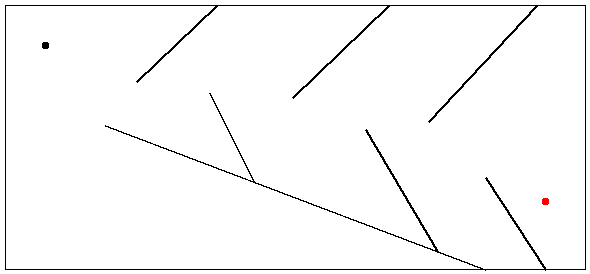

Step 20:


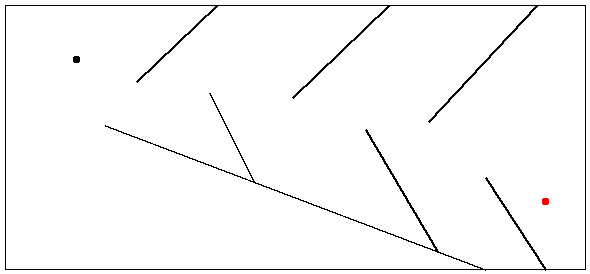

Step 40:


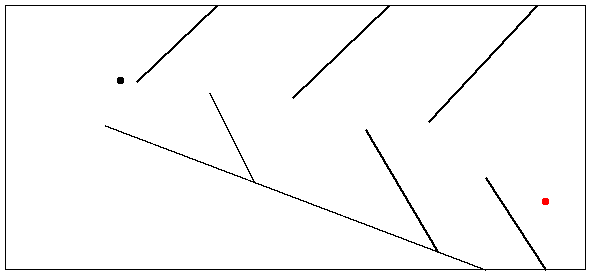

Step 60:


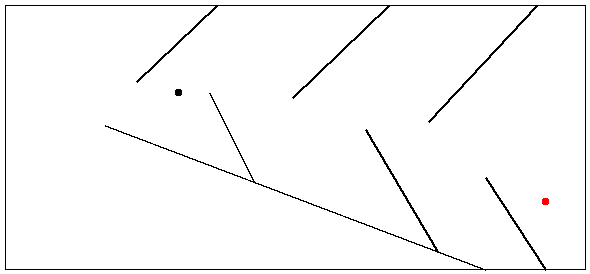

Step 80:


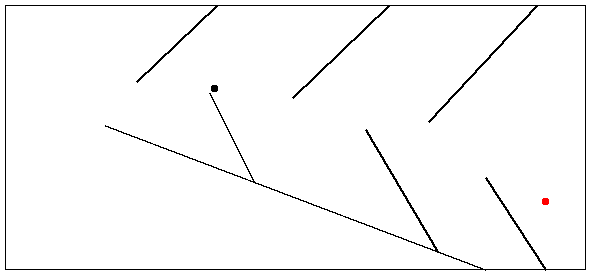

Step 100:


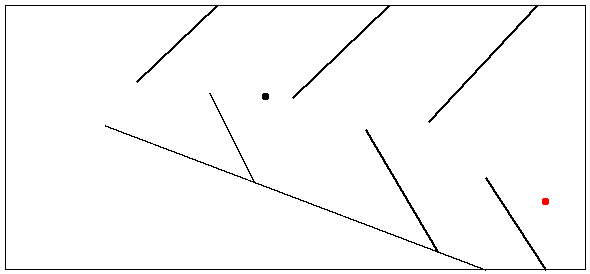

Step 120:


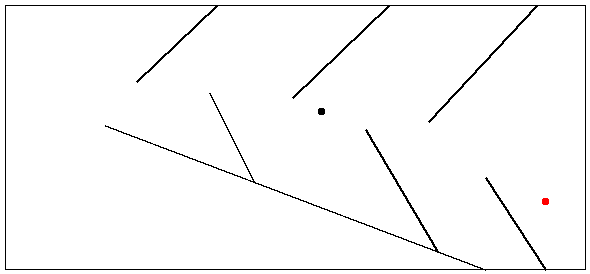

Step 140:


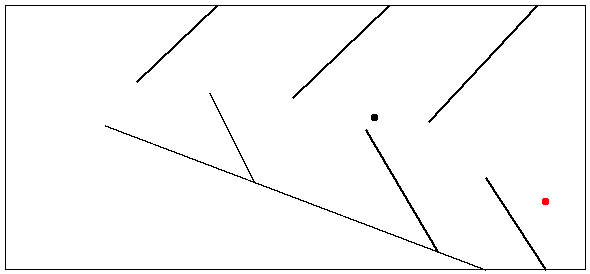

Step 160:


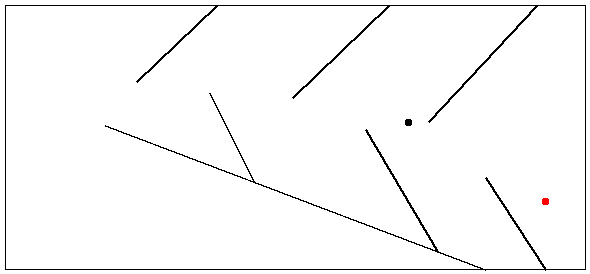

Step 180:


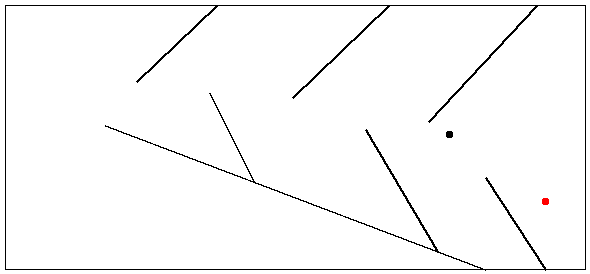

Step 200:


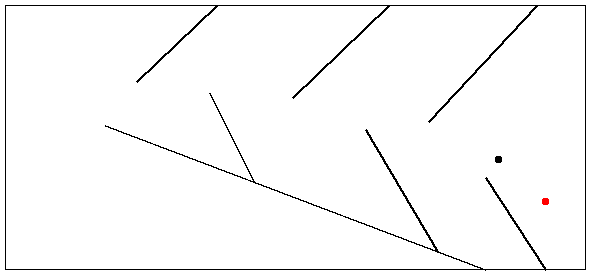

Step 220:


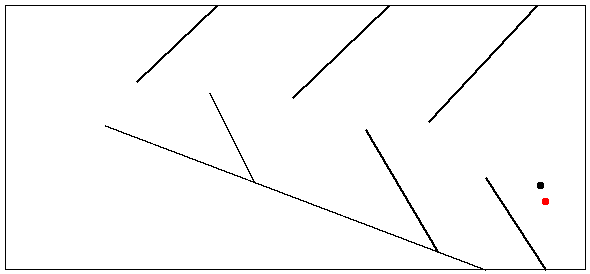

Step 240:


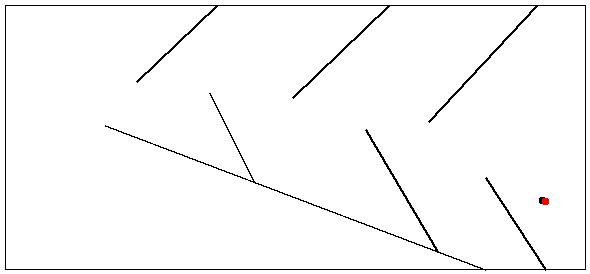

Goal reached in 245 steps:


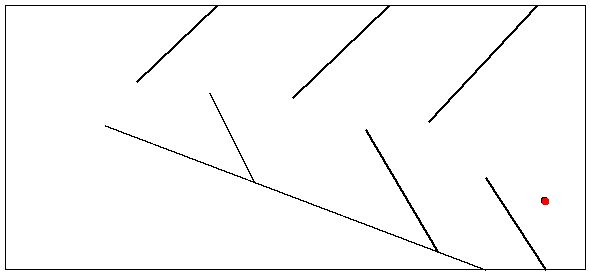

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:20<16:31, 20.24s/it]

fitness at iteration 1 203.93033276922702
1 - Test


  4%|▍         | 2/50 [00:39<15:50, 19.81s/it]

fitness at iteration 2 203.93033276922702
2 - Test


  6%|▌         | 3/50 [00:57<15:13, 19.44s/it]

fitness at iteration 3 203.93033276922702
3 - Test


  8%|▊         | 4/50 [01:16<14:46, 19.27s/it]

fitness at iteration 4 206.00697395222278
4 - Test


 10%|█         | 5/50 [01:35<14:21, 19.15s/it]

fitness at iteration 5 206.00697395222278
5 - Test


 12%|█▏        | 6/50 [01:53<13:52, 18.92s/it]

fitness at iteration 6 206.16005087703374
6 - Test


 14%|█▍        | 7/50 [02:12<13:27, 18.79s/it]

fitness at iteration 7 206.16005087703374
7 - Test


 16%|█▌        | 8/50 [02:30<13:03, 18.65s/it]

fitness at iteration 8 206.16005087703374
8 - Test


 18%|█▊        | 9/50 [02:48<12:41, 18.58s/it]

fitness at iteration 9 206.16005087703374
9 - Test


 20%|██        | 10/50 [03:06<12:16, 18.41s/it]

fitness at iteration 10 206.16005087703374
10 - Test


 22%|██▏       | 11/50 [03:25<11:59, 18.44s/it]

fitness at iteration 11 206.16005087703374
11 - Test


 24%|██▍       | 12/50 [03:43<11:39, 18.41s/it]

fitness at iteration 12 206.16005087703374
12 - Test


 26%|██▌       | 13/50 [04:02<11:18, 18.34s/it]

fitness at iteration 13 206.16005087703374
13 - Test


 28%|██▊       | 14/50 [04:20<11:01, 18.36s/it]

fitness at iteration 14 206.16005087703374
14 - Test


 30%|███       | 15/50 [04:38<10:40, 18.29s/it]

fitness at iteration 15 206.16005087703374
15 - Test


 32%|███▏      | 16/50 [04:56<10:21, 18.28s/it]

fitness at iteration 16 206.16005087703374
16 - Test


 34%|███▍      | 17/50 [05:14<10:02, 18.25s/it]

fitness at iteration 17 206.16005087703374
17 - Test


 36%|███▌      | 18/50 [05:33<09:43, 18.24s/it]

fitness at iteration 18 206.16005087703374
18 - Test


 38%|███▊      | 19/50 [05:51<09:26, 18.26s/it]

fitness at iteration 19 206.16005087703374
19 - Test


 40%|████      | 20/50 [06:09<09:07, 18.25s/it]

fitness at iteration 20 206.16005087703374
20 - Test


 42%|████▏     | 21/50 [06:28<08:51, 18.33s/it]

fitness at iteration 21 206.16005087703374
21 - Test


 44%|████▍     | 22/50 [06:46<08:33, 18.33s/it]

fitness at iteration 22 206.16005087703374
22 - Test


 46%|████▌     | 23/50 [07:04<08:14, 18.32s/it]

fitness at iteration 23 206.16005087703374
23 - Test


 48%|████▊     | 24/50 [07:22<07:54, 18.26s/it]

fitness at iteration 24 206.16005087703374
24 - Test


 50%|█████     | 25/50 [07:41<07:36, 18.26s/it]

fitness at iteration 25 206.16005087703374
25 - Test


 52%|█████▏    | 26/50 [07:59<07:16, 18.20s/it]

fitness at iteration 26 206.16005087703374
26 - Test


 54%|█████▍    | 27/50 [08:17<06:59, 18.26s/it]

fitness at iteration 27 206.16005087703374
27 - Test


 56%|█████▌    | 28/50 [08:36<06:44, 18.37s/it]

fitness at iteration 28 206.16005087703374
28 - Test


 58%|█████▊    | 29/50 [08:55<06:27, 18.46s/it]

fitness at iteration 29 206.16005087703374
29 - Test


 60%|██████    | 30/50 [09:13<06:09, 18.46s/it]

fitness at iteration 30 206.16005087703374
30 - Test


 62%|██████▏   | 31/50 [09:32<05:52, 18.54s/it]

fitness at iteration 31 206.16005087703374
31 - Test


 64%|██████▍   | 32/50 [09:52<05:43, 19.08s/it]

fitness at iteration 32 206.16005087703374
32 - Test


 66%|██████▌   | 33/50 [10:11<05:22, 18.94s/it]

fitness at iteration 33 206.16005087703374
33 - Test


 68%|██████▊   | 34/50 [10:29<05:01, 18.87s/it]

fitness at iteration 34 206.16005087703374
34 - Test


 70%|███████   | 35/50 [10:48<04:43, 18.87s/it]

fitness at iteration 35 206.39425453284736
35 - Test


 72%|███████▏  | 36/50 [11:07<04:23, 18.79s/it]

fitness at iteration 36 206.39425453284736
36 - Test


 74%|███████▍  | 37/50 [11:25<04:02, 18.69s/it]

fitness at iteration 37 206.39425453284736
37 - Test


 76%|███████▌  | 38/50 [11:44<03:43, 18.64s/it]

fitness at iteration 38 206.39425453284736
38 - Test


 78%|███████▊  | 39/50 [12:03<03:27, 18.84s/it]

fitness at iteration 39 206.39425453284736
39 - Test


 80%|████████  | 40/50 [12:22<03:08, 18.85s/it]

fitness at iteration 40 206.39425453284736
40 - Test


 82%|████████▏ | 41/50 [12:41<02:49, 18.82s/it]

fitness at iteration 41 206.39425453284736
41 - Test


 84%|████████▍ | 42/50 [12:59<02:29, 18.63s/it]

fitness at iteration 42 206.39425453284736
42 - Test


 86%|████████▌ | 43/50 [13:17<02:09, 18.51s/it]

fitness at iteration 43 206.39425453284736
43 - Test


 88%|████████▊ | 44/50 [13:36<01:51, 18.59s/it]

fitness at iteration 44 206.39425453284736
44 - Test


 90%|█████████ | 45/50 [13:54<01:32, 18.53s/it]

fitness at iteration 45 206.39425453284736
45 - Test


 92%|█████████▏| 46/50 [14:13<01:13, 18.48s/it]

fitness at iteration 46 206.39425453284736
46 - Test


 94%|█████████▍| 47/50 [14:31<00:55, 18.44s/it]

fitness at iteration 47 206.39425453284736
47 - Test


 96%|█████████▌| 48/50 [14:49<00:36, 18.40s/it]

fitness at iteration 48 206.39425453284736
48 - Test


 98%|█████████▊| 49/50 [15:08<00:18, 18.37s/it]

fitness at iteration 49 206.39425453284736
49 - Test


100%|██████████| 50/50 [15:26<00:00, 18.53s/it]

fitness at iteration 50 206.39425453284736
local optimum discovered by solver:
 [-0.00188251  0.31698636  0.05687812 ...  0.26662698  0.5844178
 -0.20183308]
fitness score at this local optimum: 206.39425453284736
           0           1           2   ...          47          48          49
0  193.049471  105.848702  187.028670  ...  182.403021  206.109406  184.881116
1  169.344128   70.807709  171.778859  ...  191.025426  196.389074  137.629668
2  193.977026  196.366586  184.293527  ...  182.823839  195.102967  191.086953
3  137.645735  170.604412  104.790802  ...  194.166407  192.177704  150.777723
4  203.930233   91.605586  178.887190  ...  182.029683  192.634584  174.966925
5  128.191397  200.074524   45.990176  ...  199.200681  192.337109  134.854915
6  185.761202  171.195941   91.434104  ...  169.604394  206.063912  199.506607
7  138.236449  185.322834  133.100684  ...  195.499729  198.298474  126.216689
8  195.690359  126.471786  203.733516  ...  125.612256  205.924265  202.911

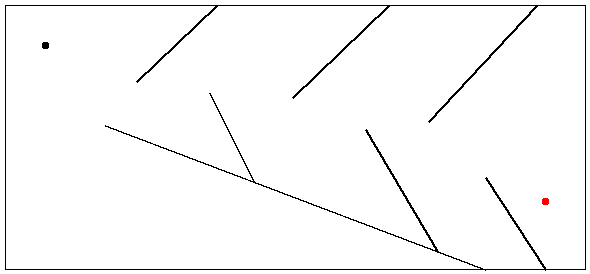

Step 20:


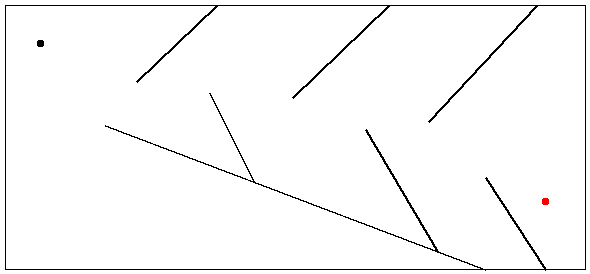

Step 40:


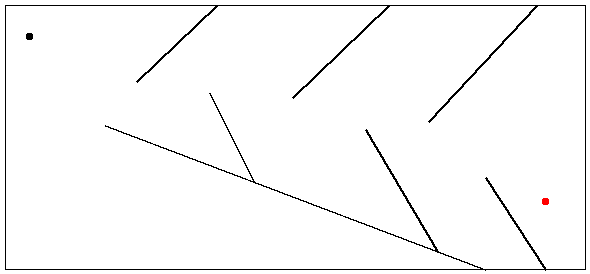

Step 60:


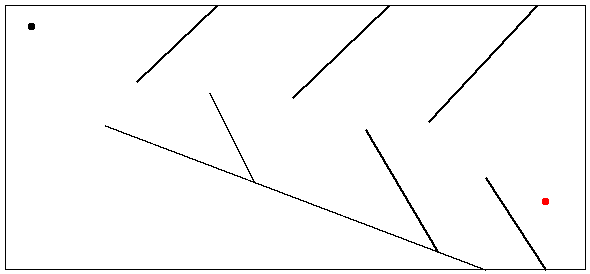

Step 80:


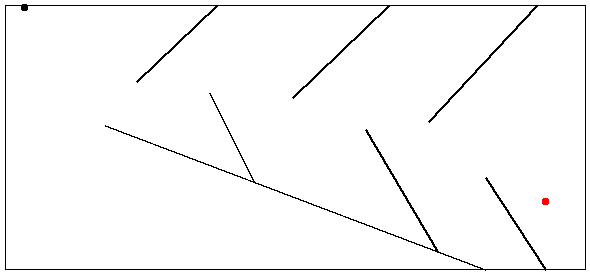

Step 100:


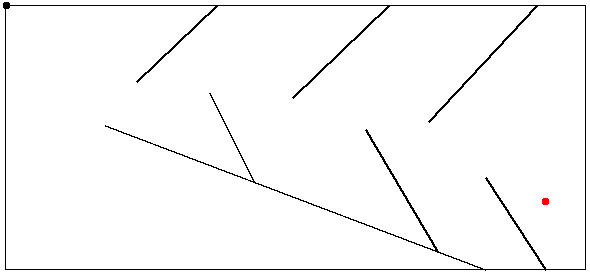

Step 120:


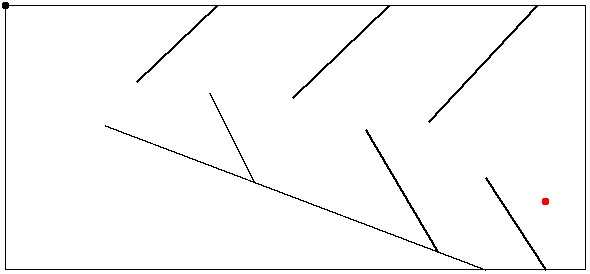

Step 140:


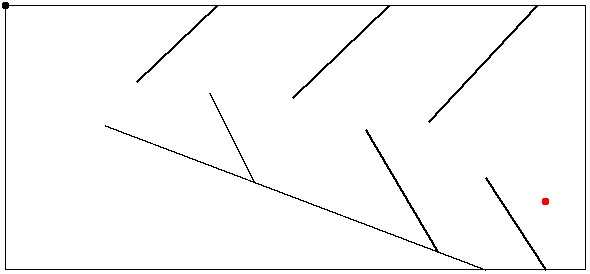

Step 160:


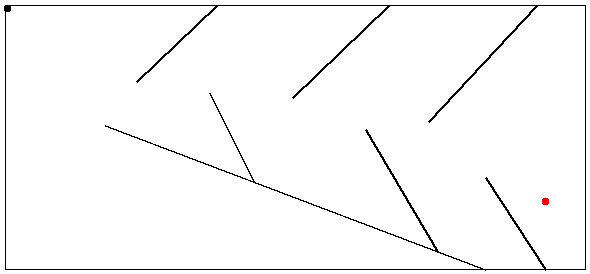

Step 180:


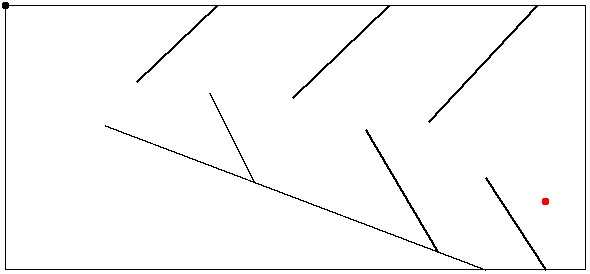

Step 200:


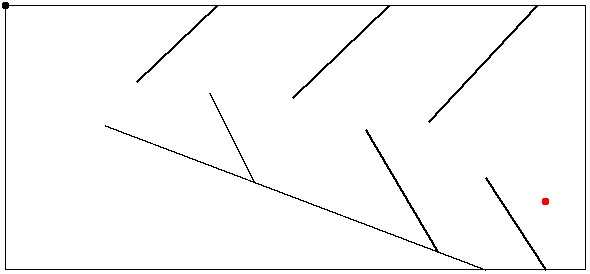

Step 220:


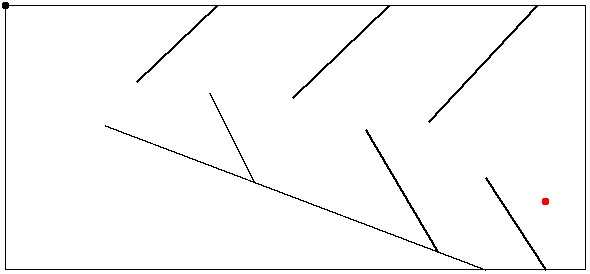

Step 240:


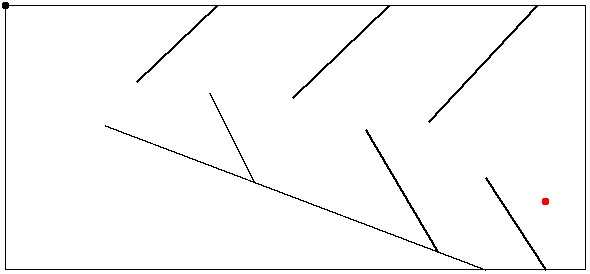

Step 260:


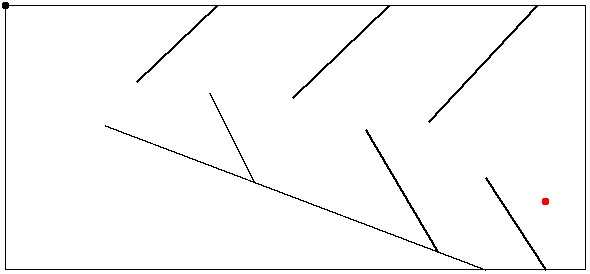

Step 280:


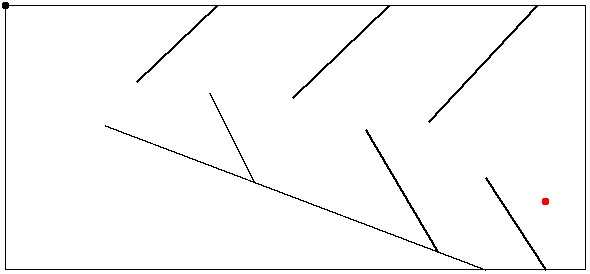

Step 300:


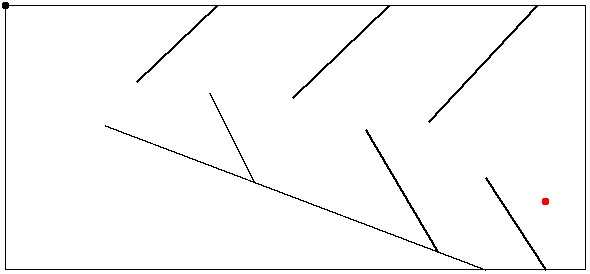

Step 320:


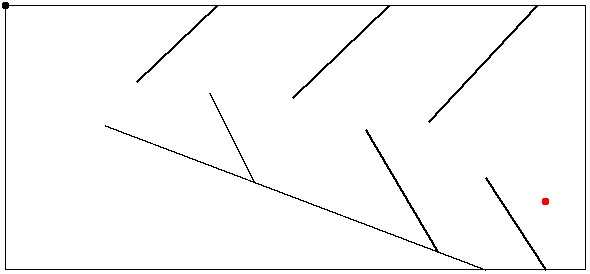

Step 340:


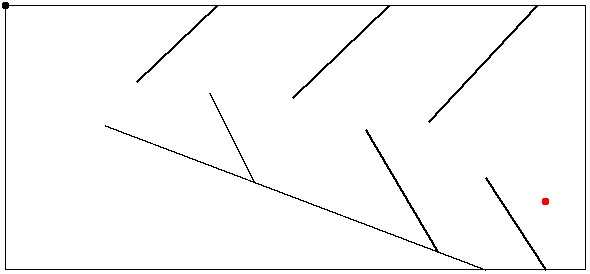

Step 360:


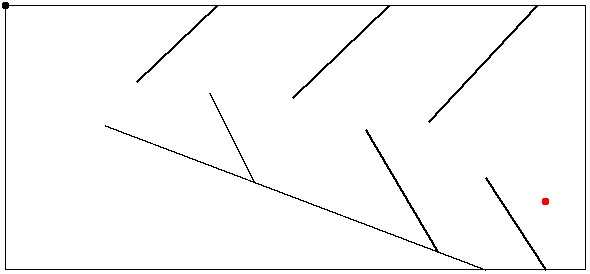

Step 380:


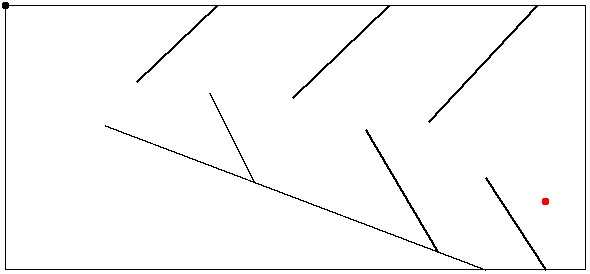

Step 399:


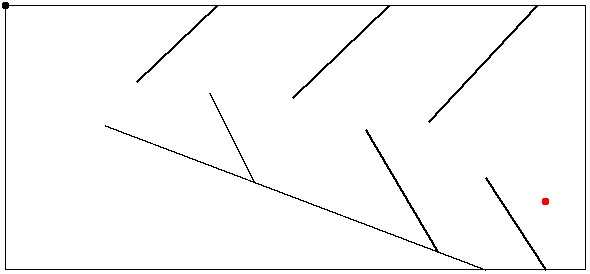

Step 400:


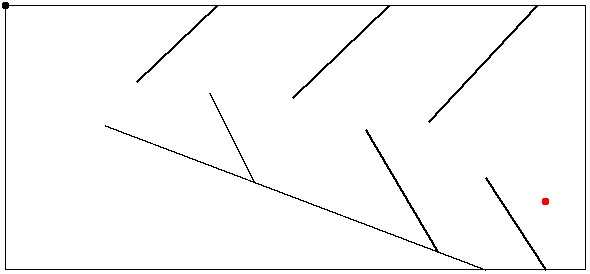

Timeout at 400 steps:


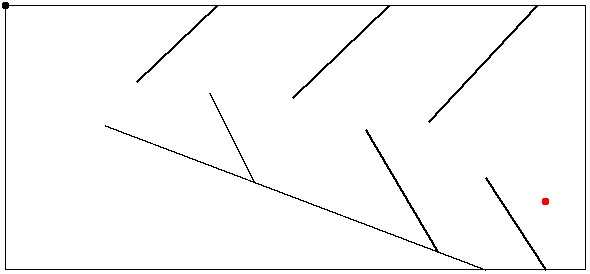

Data Frame: ES
           0           1           2   ...          47          48          49
0  183.103646  171.458810  161.692245  ...  171.460577  171.607590  171.460777
1  140.280051  171.424500  184.526770  ...  171.380799  171.460004  171.459917
2  171.528741  171.545953  171.471435  ...  171.460000  171.368106  173.059490
3  172.473535  190.693232  155.610869  ...  171.460000  146.763841  167.018354
4  164.232864  171.460113  183.338748  ...  192.444367  150.481645  171.460000
5  172.483396  182.666464  171.460000  ...  171.454176  171.329905  178.767979
6  172.357656  171.425472  172.675717  ...  165.032609  171.460001  171.460000
7  171.294324  171.453780  171.451357  ...  171.460001  171.460000  174.197006
8  169.451955  171.461077  177.568133  ...  171.464816  166.998948  194.788143
9  171.028270  172.145876  171.369328  ...  174.385360  171.460000  172.985994

[10 rows x 50 columns]
Data Frame: GA
           0           1           2   ...          47          48          4

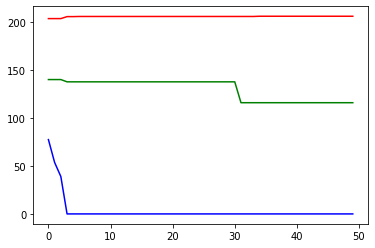

In [ ]:
  import matplotlib.pyplot as plt
  #%matplotlib inline
  from tqdm import tqdm
  import os
  import numpy as np
  from shapely.geometry import Point, LineString
  import copy

  if __name__ == "__main__":

    network = NumpyNetwork(10, 128, 128, 2)
    evoES = ES(popsize=10, nParams=network.nParams, max_iter=50)
    evoGA = SimpleGA(popsize=10, num_params=network.nParams)
    evoCMAES = CMAES(popsize=10,num_params=network.nParams)
    evoGA.MAX_ITERATION = 50
    evoCMAES.MAX_ITERATION = 50 
    controller = ANNcontroller
    maze = mediumMaze

    ### Evolution Strategy Code
    if ESData == None:
      historyES = test_solver(evoES)
      ESData = historyES
      #pltESData = plt.plot(historyES['best'])
      dfES = pd.DataFrame.from_dict({i:historyES[i] for i in range(evoES.MAX_ITERATION)})
      print(dfES)
      network.update(evoES.bestParams)
      runSimulation(maze, controller, render=True)

    ### Genetic Alg Code
    if GAData == None:
      historyGA = test_solver(evoGA)
      GAData = historyGA
      #pltGAData = plt.plot(historyGA['best'])
      dfGA = pd.DataFrame.from_dict({i:historyGA[i] for i in range(evoGA.MAX_ITERATION)})
      print(dfGA)
      network.update(evoGA.best_param)
      runSimulation(maze, controller, render=True)

    ### CMA-ES Code
    if CMAESData == None:
      historyCMAES = test_solver(evoCMAES)
      CMAESData = historyCMAES
      dfCMAES = pd.DataFrame.from_dict({i:historyCMAES[i] for i in range(evoCMAES.MAX_ITERATION)})
      print(dfCMAES)
      network.update(evoCMAES.best_param())
      runSimulation(maze, controller, render=True)



    ##print
    print('Data Frame: ES')
    print(dfES)
    plt.plot(historyES['best'],color = "green")
    print('Data Frame: GA')
    print(dfGA)
    plt.plot(historyGA['best'], color="blue")
    print('Data Frame : CMAES')
    print(dfCMAES)
    plt.plot(historyCMAES['best'], color="red")

#medium maze standard deviation plot 
In order to explain the variation of robots in different time steps I have ploted standard deviation graph which instantly help us to understand how far our robot is in search of our goal. 
best_iteration_medium_maze is the line I consider as a base to explain this.
->If you see ES_standard_deviation_medium_maze which is depicted in blue color it clearly shows that there is hardly any movement of robot towards the goal.
->Coming towards "GA_standard_deviation_medium_maze" which is depicted in green color shows the perfect movement of the robot which explores the maze environment and reaches the goal while exploring the environment.
-> Moving forward towrds"CMAES_standard_deviation_medium_maze" which is depicted in red color shows that the robot tries to explore the path but it gets lower fitness values and it gets killed up.

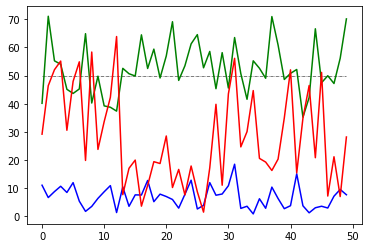

In [ ]:
MAX_ITERATION = 50 
best_iteration_medium_maze = [50] * MAX_ITERATION 
ES_standard_deviation_medium_maze = dfES.std()
GA_standard_deviation_medium_maze = dfGA.std()
CMAES_standard_deviation_medium_maze = dfCMAES.std()
plt.plot(best_iteration_medium_maze, color="black",linewidth=0.5, linestyle="-.")
plt.plot(ES_standard_deviation_medium_maze,color="blue")
plt.plot(GA_standard_deviation_medium_maze,color="green")
plt.plot(CMAES_standard_deviation_medium_maze,color="red")

#Test maze

  0%|          | 0/50 [00:00<?, ?it/s]

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 17920 (seed=378008, Thu Dec 17 16:45:01 2020)
0 - Test


  2%|▏         | 1/50 [00:14<11:59, 14.68s/it]

fitness at iteration 1 30.799961957704323
1 - Test


  4%|▍         | 2/50 [00:28<11:38, 14.54s/it]

fitness at iteration 2 26.308966065637886
2 - Test


  6%|▌         | 3/50 [00:43<11:22, 14.53s/it]

fitness at iteration 3 26.308966065637886
3 - Test


  8%|▊         | 4/50 [00:57<11:06, 14.50s/it]

fitness at iteration 4 26.308966065637886
4 - Test


 10%|█         | 5/50 [01:12<10:56, 14.59s/it]

fitness at iteration 5 26.308966065637886
5 - Test


 12%|█▏        | 6/50 [01:27<10:47, 14.72s/it]

fitness at iteration 6 26.308966065637886
6 - Test


 14%|█▍        | 7/50 [01:42<10:28, 14.62s/it]

fitness at iteration 7 26.308966065637886
7 - Test


 16%|█▌        | 8/50 [01:56<10:10, 14.54s/it]

fitness at iteration 8 26.308966065637886
8 - Test


 18%|█▊        | 9/50 [02:10<09:52, 14.45s/it]

fitness at iteration 9 26.308966065637886
9 - Test


 20%|██        | 10/50 [02:24<09:36, 14.42s/it]

fitness at iteration 10 26.308966065637886
10 - Test


 22%|██▏       | 11/50 [02:39<09:22, 14.42s/it]

fitness at iteration 11 26.308966065637886
11 - Test


 24%|██▍       | 12/50 [02:53<09:08, 14.44s/it]

fitness at iteration 12 26.308966065637886
12 - Test


 26%|██▌       | 13/50 [03:08<08:52, 14.41s/it]

fitness at iteration 13 26.308966065637886
13 - Test


 28%|██▊       | 14/50 [03:22<08:38, 14.41s/it]

fitness at iteration 14 26.308966065637886
14 - Test


 30%|███       | 15/50 [03:36<08:22, 14.37s/it]

fitness at iteration 15 26.308966065637886
15 - Test


 32%|███▏      | 16/50 [03:50<08:05, 14.28s/it]

fitness at iteration 16 26.308966065637886
16 - Test


 34%|███▍      | 17/50 [04:05<07:53, 14.36s/it]

fitness at iteration 17 26.308966065637886
17 - Test


 36%|███▌      | 18/50 [04:19<07:40, 14.38s/it]

fitness at iteration 18 26.308966065637886
18 - Test


 38%|███▊      | 19/50 [04:34<07:26, 14.39s/it]

fitness at iteration 19 26.308966065637886
19 - Test


 40%|████      | 20/50 [04:48<07:11, 14.38s/it]

fitness at iteration 20 26.308966065637886
20 - Test


 42%|████▏     | 21/50 [05:02<06:55, 14.34s/it]

fitness at iteration 21 26.308966065637886
21 - Test


 44%|████▍     | 22/50 [05:17<06:42, 14.36s/it]

fitness at iteration 22 26.308966065637886
22 - Test


 46%|████▌     | 23/50 [05:31<06:27, 14.36s/it]

fitness at iteration 23 26.308966065637886
23 - Test


 48%|████▊     | 24/50 [05:46<06:16, 14.48s/it]

fitness at iteration 24 26.308966065637886
24 - Test


 50%|█████     | 25/50 [06:00<06:01, 14.45s/it]

fitness at iteration 25 26.308966065637886
25 - Test


 52%|█████▏    | 26/50 [06:15<05:45, 14.39s/it]

fitness at iteration 26 26.308966065637886
26 - Test


 54%|█████▍    | 27/50 [06:29<05:31, 14.40s/it]

fitness at iteration 27 26.308966065637886
27 - Test


 56%|█████▌    | 28/50 [06:43<05:16, 14.41s/it]

fitness at iteration 28 26.308966065637886
28 - Test


 58%|█████▊    | 29/50 [06:58<05:05, 14.53s/it]

fitness at iteration 29 26.308966065637886
29 - Test


 60%|██████    | 30/50 [07:13<04:50, 14.52s/it]

fitness at iteration 30 26.308966065637886
30 - Test


 62%|██████▏   | 31/50 [07:27<04:35, 14.52s/it]

fitness at iteration 31 26.308966065637886
31 - Test


 64%|██████▍   | 32/50 [07:42<04:21, 14.50s/it]

fitness at iteration 32 26.308966065637886
32 - Test


 66%|██████▌   | 33/50 [07:56<04:05, 14.45s/it]

fitness at iteration 33 26.308966065637886
33 - Test


 68%|██████▊   | 34/50 [08:10<03:50, 14.38s/it]

fitness at iteration 34 26.308966065637886
34 - Test


 70%|███████   | 35/50 [08:25<03:35, 14.40s/it]

fitness at iteration 35 26.308966065637886
35 - Test


 72%|███████▏  | 36/50 [08:43<03:35, 15.42s/it]

fitness at iteration 36 26.308966065637886
36 - Test


 74%|███████▍  | 37/50 [08:57<03:15, 15.05s/it]

fitness at iteration 37 26.308966065637886
37 - Test


 76%|███████▌  | 38/50 [09:12<03:02, 15.21s/it]

fitness at iteration 38 26.308966065637886
38 - Test


 78%|███████▊  | 39/50 [09:27<02:44, 14.96s/it]

fitness at iteration 39 26.308966065637886
39 - Test


 80%|████████  | 40/50 [09:41<02:27, 14.77s/it]

fitness at iteration 40 26.308966065637886
40 - Test


 82%|████████▏ | 41/50 [09:55<02:11, 14.64s/it]

fitness at iteration 41 26.308966065637886
41 - Test


 84%|████████▍ | 42/50 [10:10<01:56, 14.61s/it]

fitness at iteration 42 26.308966065637886
42 - Test


 86%|████████▌ | 43/50 [10:24<01:41, 14.55s/it]

fitness at iteration 43 26.308966065637886
43 - Test


 88%|████████▊ | 44/50 [10:38<01:26, 14.43s/it]

fitness at iteration 44 26.308966065637886
44 - Test


 90%|█████████ | 45/50 [10:53<01:12, 14.48s/it]

fitness at iteration 45 26.308966065637886
45 - Test


 92%|█████████▏| 46/50 [11:07<00:57, 14.38s/it]

fitness at iteration 46 26.308966065637886
46 - Test


 94%|█████████▍| 47/50 [11:21<00:42, 14.31s/it]

fitness at iteration 47 26.308966065637886
47 - Test


 96%|█████████▌| 48/50 [11:36<00:28, 14.44s/it]

fitness at iteration 48 26.308966065637886
48 - Test


 98%|█████████▊| 49/50 [11:51<00:14, 14.46s/it]

fitness at iteration 49 26.308966065637886
49 - Test


100%|██████████| 50/50 [12:06<00:00, 14.52s/it]

fitness at iteration 50 26.308966065637886
local optimum discovered by solver:
 [-2.58290672 -0.11177838 -0.62590599 ... -1.13178803  0.0086267
  1.00281669]
fitness score at this local optimum: 26.308966065637886
          0          1          2   ...         47         48         49
0  35.954196  33.050000  33.050003  ...  33.049898  32.833621  34.466102
1  30.799962  32.669220  33.050013  ...  37.451574  31.425075  33.148092
2  36.281313  33.222348  33.046746  ...  33.238942  33.322110  33.050004
3  32.432435  33.058844  34.205996  ...  31.984899  33.304184  34.182232
4  33.108166  33.076899  32.742111  ...  33.050001  33.038499  33.050000
5  32.226610  33.050004  32.539704  ...  33.037377  33.050656  33.655302
6  33.048760  35.621165  33.050000  ...  33.050000  33.049899  38.444486
7  33.050176  33.156553  34.001687  ...  32.987567  31.639695  34.411906
8  39.605668  26.308966  33.044925  ...  33.050000  32.904914  33.034134
9  33.170416  33.049998  30.491868  ...  29.758889  30.0

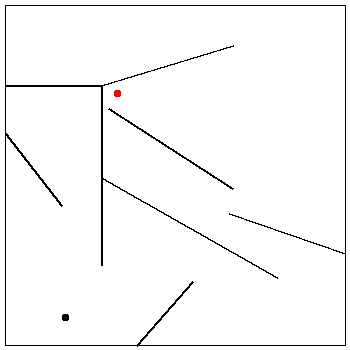

Step 20:


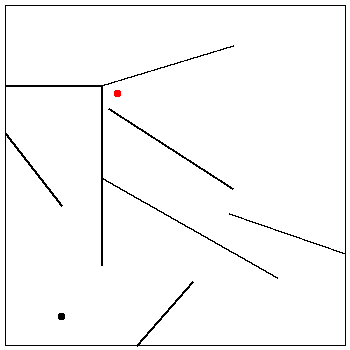

Step 40:


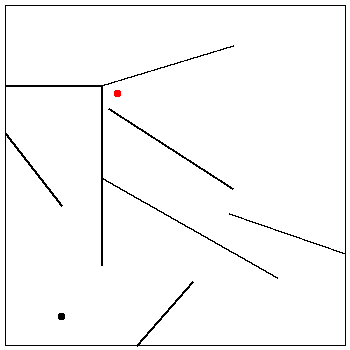

Step 60:


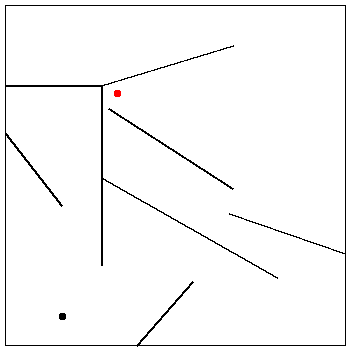

Step 80:


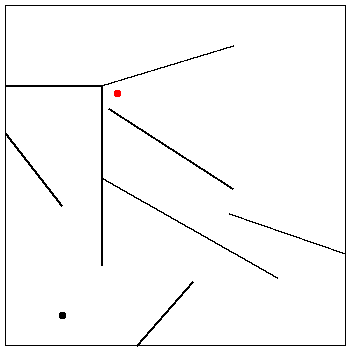

Step 100:


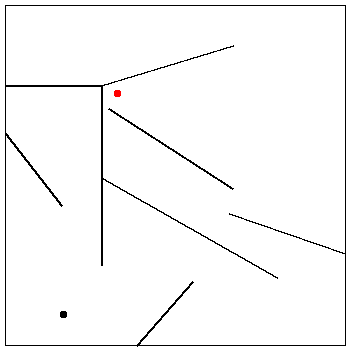

Step 120:


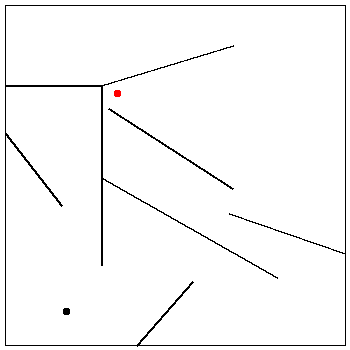

Step 140:


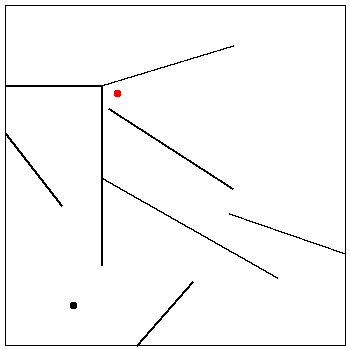

Step 160:


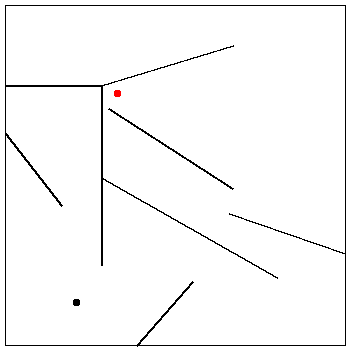

Step 180:


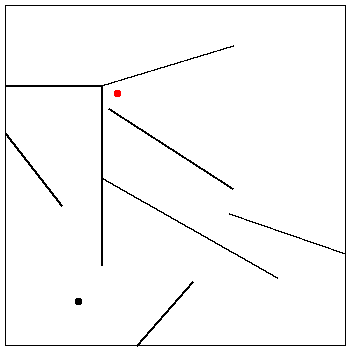

Step 200:


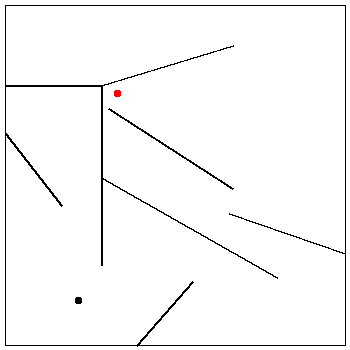

Step 220:


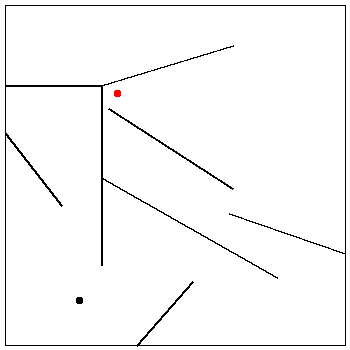

Step 240:


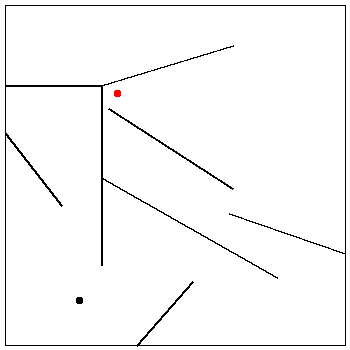

Step 260:


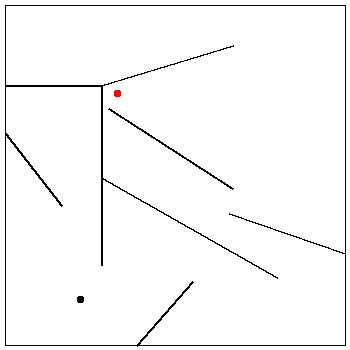

Step 280:


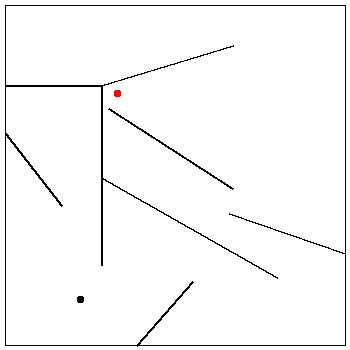

Step 300:


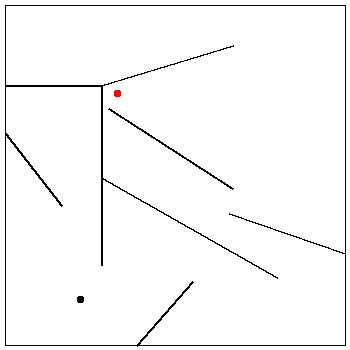

Step 320:


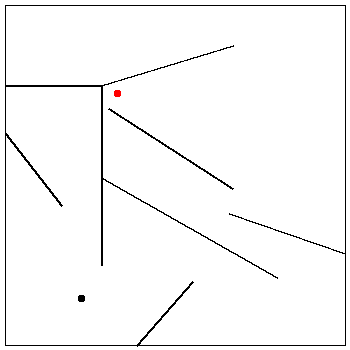

Step 340:


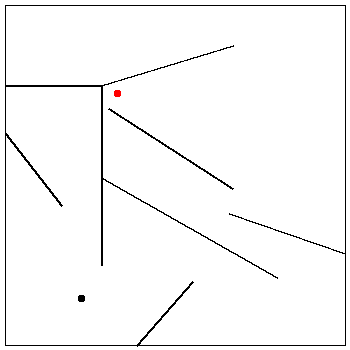

Step 360:


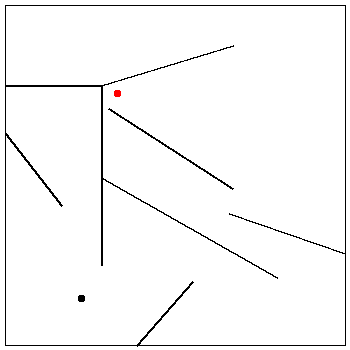

Step 380:


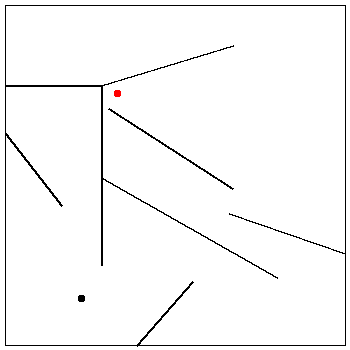

Step 399:


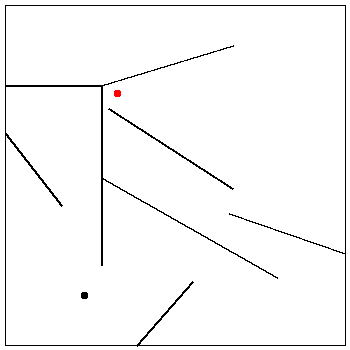

Step 400:


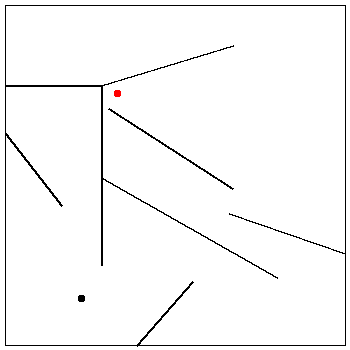

Timeout at 400 steps:


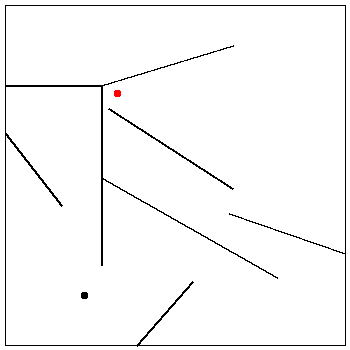

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:15<12:38, 15.47s/it]

fitness at iteration 1 12.350430028874516
1 - Test


  4%|▍         | 2/50 [00:30<12:20, 15.42s/it]

fitness at iteration 2 12.255420951628867
2 - Test


  6%|▌         | 3/50 [00:46<12:02, 15.37s/it]

fitness at iteration 3 12.240358399057577
3 - Test


  8%|▊         | 4/50 [01:01<11:46, 15.35s/it]

fitness at iteration 4 0.6998351139915875
4 - Test


 10%|█         | 5/50 [01:17<11:35, 15.45s/it]

fitness at iteration 5 0.6998351139915875
5 - Test


 12%|█▏        | 6/50 [01:32<11:19, 15.45s/it]

fitness at iteration 6 0.6998351139915875
6 - Test


 14%|█▍        | 7/50 [01:47<11:01, 15.39s/it]

fitness at iteration 7 0.6998351139915875
7 - Test


 16%|█▌        | 8/50 [02:03<10:48, 15.44s/it]

fitness at iteration 8 0.6998351139915875
8 - Test


 18%|█▊        | 9/50 [02:18<10:33, 15.46s/it]

fitness at iteration 9 0.16790044482837763
9 - Test


 20%|██        | 10/50 [02:34<10:20, 15.50s/it]

fitness at iteration 10 0.16790044482837763
10 - Test


 22%|██▏       | 11/50 [02:49<10:02, 15.45s/it]

fitness at iteration 11 0.1664430276791245
11 - Test


 24%|██▍       | 12/50 [03:05<09:48, 15.49s/it]

fitness at iteration 12 0.1664430276791245
12 - Test


 26%|██▌       | 13/50 [03:21<09:36, 15.57s/it]

fitness at iteration 13 0.1664430276791245
13 - Test


 28%|██▊       | 14/50 [03:36<09:19, 15.55s/it]

fitness at iteration 14 0.1664430276791245
14 - Test


 30%|███       | 15/50 [03:52<09:03, 15.52s/it]

fitness at iteration 15 0.1664430276791245
15 - Test


 32%|███▏      | 16/50 [04:07<08:49, 15.59s/it]

fitness at iteration 16 0.1664430276791245
16 - Test


 34%|███▍      | 17/50 [04:23<08:36, 15.65s/it]

fitness at iteration 17 0.1664430276791245
17 - Test


 36%|███▌      | 18/50 [04:39<08:23, 15.72s/it]

fitness at iteration 18 0.1664430276791245
18 - Test


 38%|███▊      | 19/50 [04:55<08:07, 15.72s/it]

fitness at iteration 19 0.1664430276791245
19 - Test


 40%|████      | 20/50 [05:10<07:44, 15.50s/it]

fitness at iteration 20 0.1664430276791245
20 - Test


 42%|████▏     | 21/50 [05:25<07:30, 15.55s/it]

fitness at iteration 21 0.1664430276791245
21 - Test


 44%|████▍     | 22/50 [05:41<07:17, 15.64s/it]

fitness at iteration 22 0.1664430276791245
22 - Test


 46%|████▌     | 23/50 [05:57<07:03, 15.69s/it]

fitness at iteration 23 0.1664430276791245
23 - Test


 48%|████▊     | 24/50 [06:13<06:48, 15.70s/it]

fitness at iteration 24 0.1664430276791245
24 - Test


 50%|█████     | 25/50 [06:29<06:34, 15.76s/it]

fitness at iteration 25 0.1664430276791245
25 - Test


 52%|█████▏    | 26/50 [06:47<06:35, 16.49s/it]

fitness at iteration 26 0.1664430276791245
26 - Test


 54%|█████▍    | 27/50 [07:02<06:12, 16.20s/it]

fitness at iteration 27 0.1664430276791245
27 - Test


 56%|█████▌    | 28/50 [07:18<05:53, 16.05s/it]

fitness at iteration 28 0.1664430276791245
28 - Test


 58%|█████▊    | 29/50 [07:34<05:33, 15.90s/it]

fitness at iteration 29 2.829077727428554e-05
29 - Test


 60%|██████    | 30/50 [07:49<05:17, 15.85s/it]

fitness at iteration 30 2.829077727428554e-05
30 - Test


 62%|██████▏   | 31/50 [08:05<05:00, 15.83s/it]

fitness at iteration 31 2.829077727428554e-05
31 - Test


 64%|██████▍   | 32/50 [08:21<04:44, 15.81s/it]

fitness at iteration 32 2.829077727428554e-05
32 - Test


 66%|██████▌   | 33/50 [08:37<04:28, 15.78s/it]

fitness at iteration 33 2.829077727428554e-05
33 - Test


 68%|██████▊   | 34/50 [08:52<04:12, 15.78s/it]

fitness at iteration 34 2.829077727428554e-05
34 - Test


 70%|███████   | 35/50 [09:08<03:57, 15.82s/it]

fitness at iteration 35 2.829077727428554e-05
35 - Test


 72%|███████▏  | 36/50 [09:24<03:41, 15.81s/it]

fitness at iteration 36 2.829077727428554e-05
36 - Test


 74%|███████▍  | 37/50 [09:40<03:25, 15.84s/it]

fitness at iteration 37 2.829077727428554e-05
37 - Test


 76%|███████▌  | 38/50 [09:55<03:08, 15.69s/it]

fitness at iteration 38 2.829077727428554e-05
38 - Test


 78%|███████▊  | 39/50 [10:11<02:53, 15.80s/it]

fitness at iteration 39 2.829077727428554e-05
39 - Test


 80%|████████  | 40/50 [10:27<02:38, 15.85s/it]

fitness at iteration 40 2.829077727428554e-05
40 - Test


 82%|████████▏ | 41/50 [10:43<02:21, 15.75s/it]

fitness at iteration 41 2.829077727428554e-05
41 - Test


 84%|████████▍ | 42/50 [10:58<02:05, 15.70s/it]

fitness at iteration 42 2.829077727428554e-05
42 - Test


 86%|████████▌ | 43/50 [11:14<01:50, 15.77s/it]

fitness at iteration 43 2.829077727428554e-05
43 - Test


 88%|████████▊ | 44/50 [11:30<01:34, 15.75s/it]

fitness at iteration 44 2.829077727428554e-05
44 - Test


 90%|█████████ | 45/50 [11:46<01:18, 15.77s/it]

fitness at iteration 45 2.829077727428554e-05
45 - Test


 92%|█████████▏| 46/50 [12:02<01:03, 15.83s/it]

fitness at iteration 46 2.829077727428554e-05
46 - Test


 94%|█████████▍| 47/50 [12:18<00:47, 15.81s/it]

fitness at iteration 47 2.829077727428554e-05
47 - Test


 96%|█████████▌| 48/50 [12:34<00:31, 15.86s/it]

fitness at iteration 48 2.829077727428554e-05
48 - Test


 98%|█████████▊| 49/50 [12:49<00:15, 15.82s/it]

fitness at iteration 49 2.829077727428554e-05
49 - Test


100%|██████████| 50/50 [13:05<00:00, 15.71s/it]

fitness at iteration 50 2.829077727428554e-05
local optimum discovered by solver:
 [ 0.08831758  0.15039775  0.02028514 ...  0.33686796  0.07333019
 -0.00637025]
fitness score at this local optimum: 2.829077727428554e-05
          0          1          2   ...         47         48         49
0  40.518577  21.714194  46.442986  ...   5.381856   5.018901  12.737238
1  35.445133  33.678372  42.588550  ...   6.541645  41.164927  33.173129
2  27.691629  42.725367  39.997010  ...   0.194858  29.535133   8.132933
3  39.880952  36.804812  47.362674  ...  14.190906   4.606408  18.895826
4  39.748012  36.536343  18.423068  ...   8.297612   8.717711  43.616291
5  39.857271  12.255421  24.620079  ...   0.365672  15.207921  29.314319
6  39.650942  40.291946  12.240358  ...   8.055897  26.531942  15.376606
7  12.350430  40.171814  35.421220  ...  11.568143   6.065028  18.126318
8  42.922641  40.884440  39.674537  ...   7.628228   8.558033   9.458685
9  31.200663  26.990890  39.012546  ...  19.30354

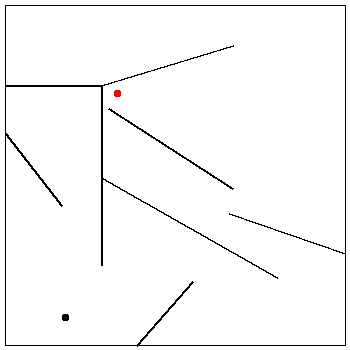

Step 20:


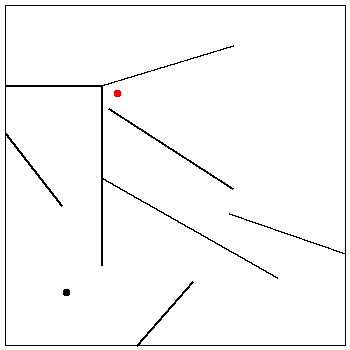

Step 40:


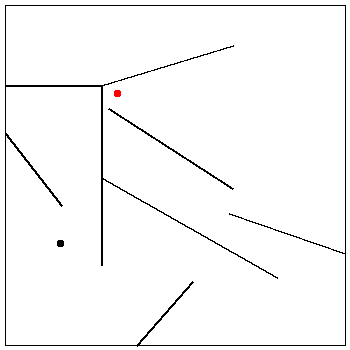

Step 60:


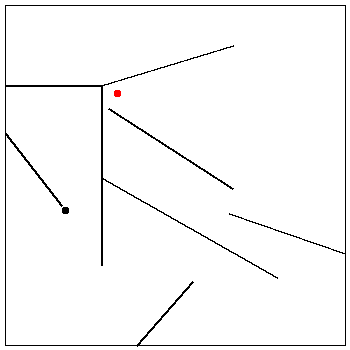

Step 80:


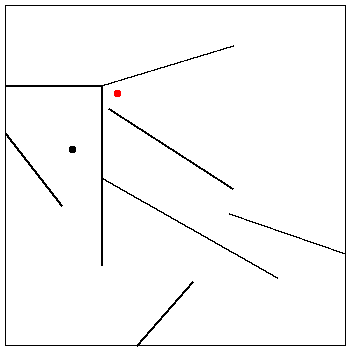

Step 100:


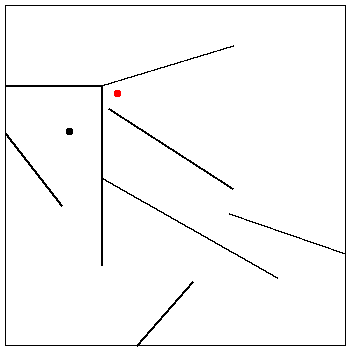

Step 120:


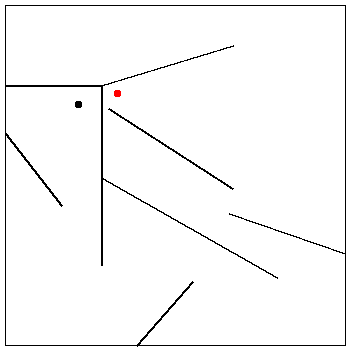

Step 140:


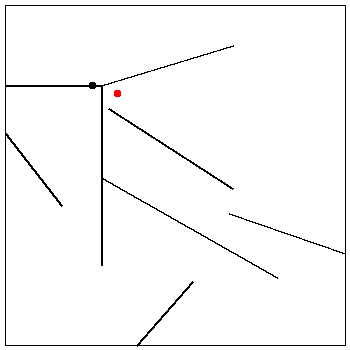

Step 160:


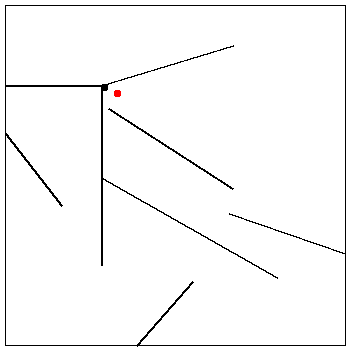

Step 180:


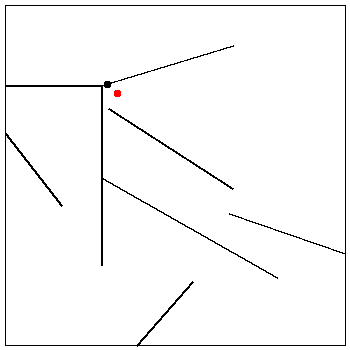

Step 200:


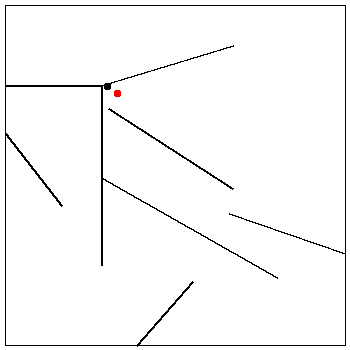

Step 220:


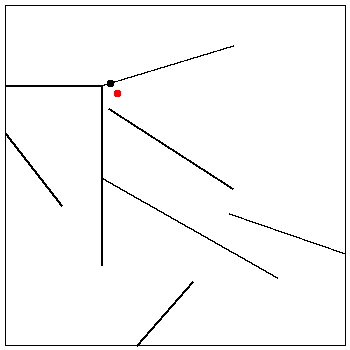

Step 240:


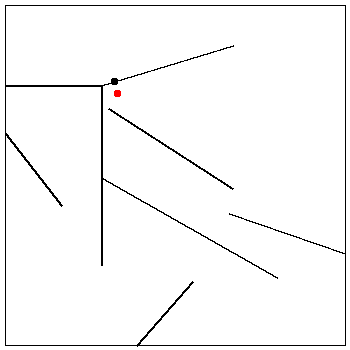

Step 260:


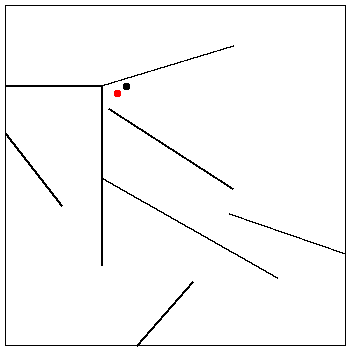

Step 280:


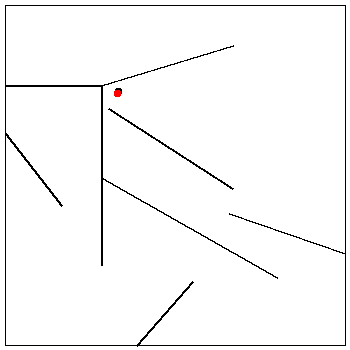

Goal reached in 291 steps:


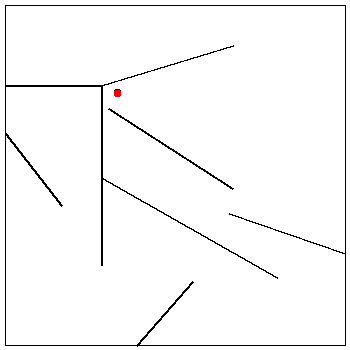

  0%|          | 0/50 [00:00<?, ?it/s]

0 - Test


  2%|▏         | 1/50 [00:22<18:33, 22.72s/it]

fitness at iteration 1 40.24688573268194
1 - Test


  4%|▍         | 2/50 [00:42<17:26, 21.81s/it]

fitness at iteration 2 40.90705458252345
2 - Test


  6%|▌         | 3/50 [01:02<16:38, 21.24s/it]

fitness at iteration 3 47.42119618533307
3 - Test


  8%|▊         | 4/50 [01:22<15:56, 20.79s/it]

fitness at iteration 4 47.42119618533307
4 - Test


 10%|█         | 5/50 [01:41<15:15, 20.35s/it]

fitness at iteration 5 47.42119618533307
5 - Test


 12%|█▏        | 6/50 [02:01<14:46, 20.15s/it]

fitness at iteration 6 47.42119618533307
6 - Test


 14%|█▍        | 7/50 [02:20<14:18, 19.97s/it]

fitness at iteration 7 47.42119618533307
7 - Test


 16%|█▌        | 8/50 [02:40<14:00, 20.01s/it]

fitness at iteration 8 47.42119618533307
8 - Test


 18%|█▊        | 9/50 [03:00<13:38, 19.96s/it]

fitness at iteration 9 47.42119618533307
9 - Test


 20%|██        | 10/50 [03:20<13:15, 19.88s/it]

fitness at iteration 10 47.42119618533307
10 - Test


 22%|██▏       | 11/50 [03:39<12:52, 19.80s/it]

fitness at iteration 11 47.42119618533307
11 - Test


 24%|██▍       | 12/50 [03:59<12:35, 19.88s/it]

fitness at iteration 12 47.42119618533307
12 - Test


 26%|██▌       | 13/50 [04:19<12:13, 19.82s/it]

fitness at iteration 13 47.42119618533307
13 - Test


 28%|██▊       | 14/50 [04:39<11:52, 19.78s/it]

fitness at iteration 14 47.42119618533307
14 - Test


 30%|███       | 15/50 [04:59<11:32, 19.78s/it]

fitness at iteration 15 47.42119618533307
15 - Test


 32%|███▏      | 16/50 [05:18<11:11, 19.75s/it]

fitness at iteration 16 47.42119618533307
16 - Test


 34%|███▍      | 17/50 [05:38<10:48, 19.64s/it]

fitness at iteration 17 48.5059588716294
17 - Test


 36%|███▌      | 18/50 [05:57<10:27, 19.61s/it]

fitness at iteration 18 48.5059588716294
18 - Test


 38%|███▊      | 19/50 [06:17<10:07, 19.61s/it]

fitness at iteration 19 48.5059588716294
19 - Test


 40%|████      | 20/50 [06:36<09:45, 19.51s/it]

fitness at iteration 20 48.5059588716294
20 - Test


 42%|████▏     | 21/50 [06:56<09:26, 19.55s/it]

fitness at iteration 21 48.5059588716294
21 - Test


 44%|████▍     | 22/50 [07:15<09:07, 19.57s/it]

fitness at iteration 22 48.5059588716294
22 - Test


 46%|████▌     | 23/50 [07:35<08:45, 19.47s/it]

fitness at iteration 23 48.5059588716294
23 - Test


 48%|████▊     | 24/50 [07:54<08:28, 19.55s/it]

fitness at iteration 24 48.5059588716294
24 - Test


 50%|█████     | 25/50 [08:14<08:12, 19.71s/it]

fitness at iteration 25 48.5059588716294
25 - Test


 52%|█████▏    | 26/50 [08:34<07:51, 19.63s/it]

fitness at iteration 26 48.5059588716294
26 - Test


 54%|█████▍    | 27/50 [08:53<07:28, 19.52s/it]

fitness at iteration 27 48.5059588716294
27 - Test


 56%|█████▌    | 28/50 [09:13<07:08, 19.49s/it]

fitness at iteration 28 48.5059588716294
28 - Test


 58%|█████▊    | 29/50 [09:32<06:48, 19.47s/it]

fitness at iteration 29 48.5059588716294
29 - Test


 60%|██████    | 30/50 [09:52<06:30, 19.52s/it]

fitness at iteration 30 48.5059588716294
30 - Test


 62%|██████▏   | 31/50 [10:11<06:11, 19.54s/it]

fitness at iteration 31 48.5059588716294
31 - Test


 64%|██████▍   | 32/50 [10:30<05:50, 19.46s/it]

fitness at iteration 32 48.5059588716294
32 - Test


 66%|██████▌   | 33/50 [10:50<05:29, 19.38s/it]

fitness at iteration 33 48.5059588716294
33 - Test


 68%|██████▊   | 34/50 [11:10<05:12, 19.56s/it]

fitness at iteration 34 48.5059588716294
34 - Test


 70%|███████   | 35/50 [11:29<04:51, 19.45s/it]

fitness at iteration 35 48.5059588716294
35 - Test


 72%|███████▏  | 36/50 [11:48<04:31, 19.43s/it]

fitness at iteration 36 48.5059588716294
36 - Test


 74%|███████▍  | 37/50 [12:08<04:13, 19.52s/it]

fitness at iteration 37 48.5059588716294
37 - Test


 76%|███████▌  | 38/50 [12:27<03:53, 19.49s/it]

fitness at iteration 38 48.5059588716294
38 - Test


 78%|███████▊  | 39/50 [12:47<03:34, 19.49s/it]

fitness at iteration 39 48.5059588716294
39 - Test


 80%|████████  | 40/50 [13:06<03:14, 19.42s/it]

fitness at iteration 40 48.5059588716294
40 - Test


 82%|████████▏ | 41/50 [13:26<02:55, 19.55s/it]

fitness at iteration 41 48.5059588716294
41 - Test


 84%|████████▍ | 42/50 [13:45<02:36, 19.51s/it]

fitness at iteration 42 48.5059588716294
42 - Test


 86%|████████▌ | 43/50 [14:06<02:18, 19.81s/it]

fitness at iteration 43 48.5059588716294
43 - Test


 88%|████████▊ | 44/50 [14:25<01:58, 19.71s/it]

fitness at iteration 44 48.5059588716294
44 - Test


 90%|█████████ | 45/50 [14:45<01:38, 19.69s/it]

fitness at iteration 45 48.5059588716294
45 - Test


 92%|█████████▏| 46/50 [15:05<01:18, 19.66s/it]

fitness at iteration 46 48.5059588716294
46 - Test


 94%|█████████▍| 47/50 [15:24<00:58, 19.57s/it]

fitness at iteration 47 48.5059588716294
47 - Test


 96%|█████████▌| 48/50 [15:44<00:39, 19.58s/it]

fitness at iteration 48 48.5059588716294
48 - Test


 98%|█████████▊| 49/50 [16:03<00:19, 19.52s/it]

fitness at iteration 49 48.5059588716294
49 - Test


100%|██████████| 50/50 [16:22<00:00, 19.65s/it]

fitness at iteration 50 48.5059588716294
local optimum discovered by solver:
 [ 0.15802821  0.06001585 -0.46598548 ... -0.03556783 -0.28872037
  0.42942069]
fitness score at this local optimum: 48.5059588716294
          0          1          2   ...         47         48         49
0  16.163873  18.643465  47.421033  ...  36.690665  42.384686  47.386745
1   8.159288  26.862522  15.357205  ...  39.877163  42.212416  34.839286
2  11.844810  39.748796  40.724629  ...  46.887944  35.839884  47.319170
3  19.377379  40.906925  40.646095  ...  45.796911  47.382609  47.393771
4  14.710052  27.632615  18.874584  ...  41.405387  47.380159  46.460810
5  23.383742  14.351410  31.914521  ...  31.201548  47.384722  45.488136
6  39.743166  39.816020  42.261161  ...  47.392813  39.033592  47.384823
7  40.246786   8.214838   8.780404  ...  39.520890  47.252747  47.077212
8  39.982054  16.140892  31.610229  ...  33.469427  38.658955  38.167622
9  29.591835  40.077675  39.659336  ...  35.579059  47.2723

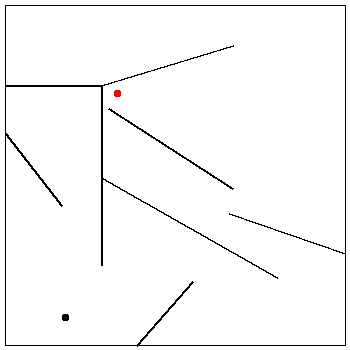

Step 20:


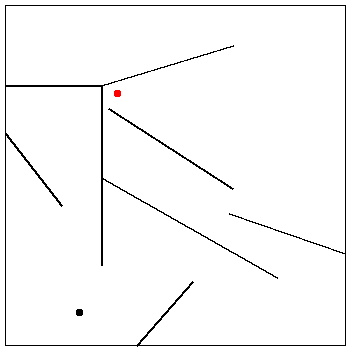

Step 40:


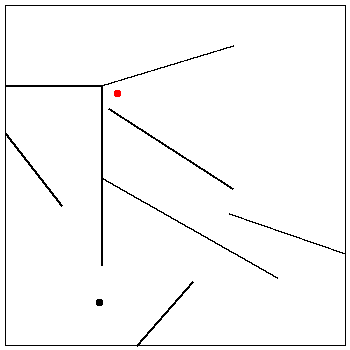

Step 60:


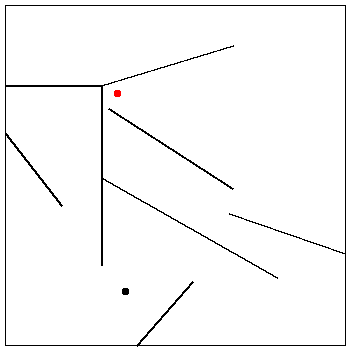

Step 80:


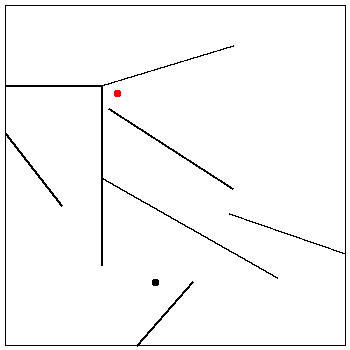

Step 100:


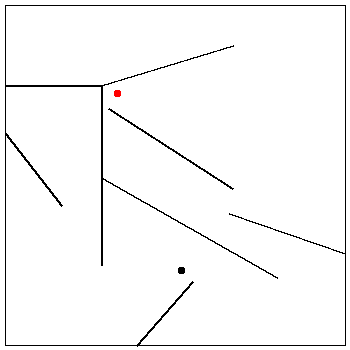

Step 120:


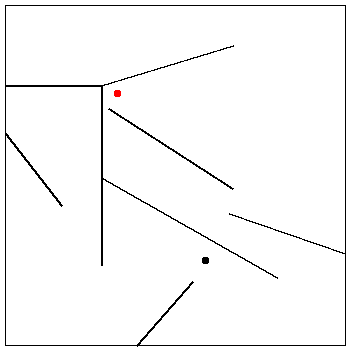

Step 140:


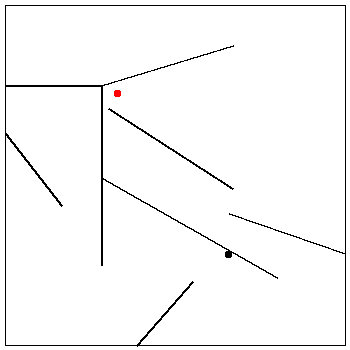

Step 160:


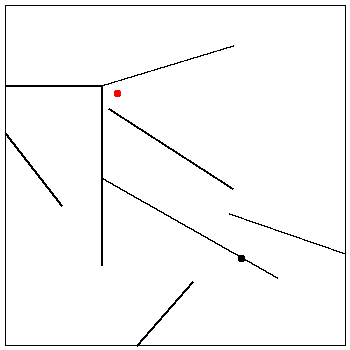

Step 180:


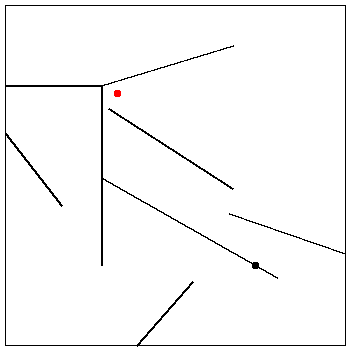

Step 200:


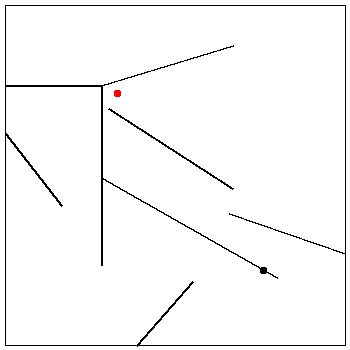

Step 220:


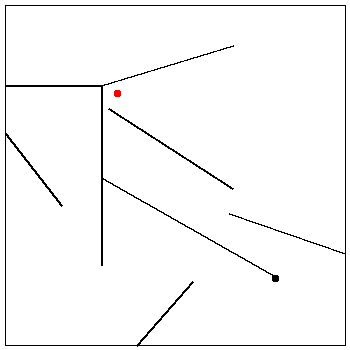

Step 240:


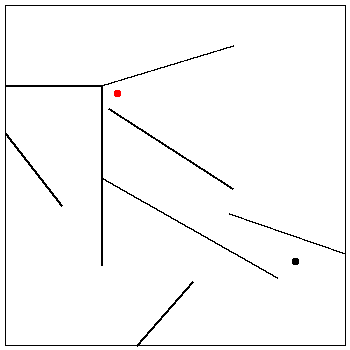

Step 260:


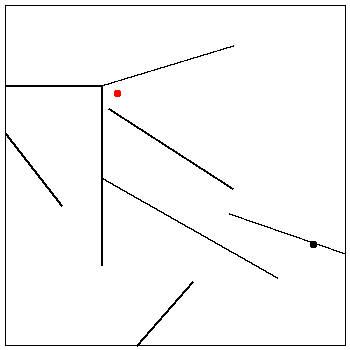

Step 280:


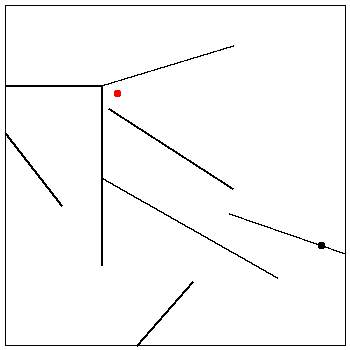

Step 300:


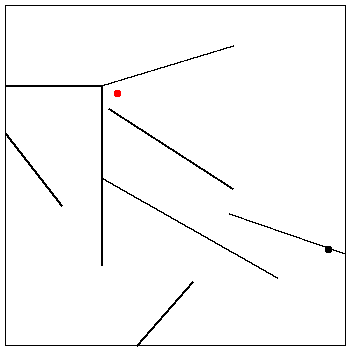

Step 320:


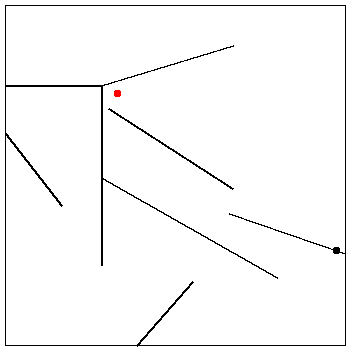

Step 340:


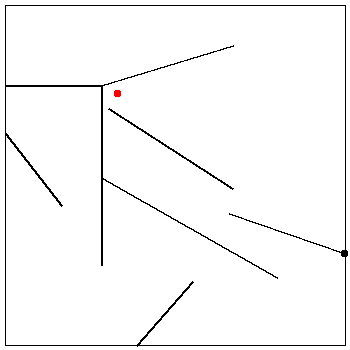

Step 360:


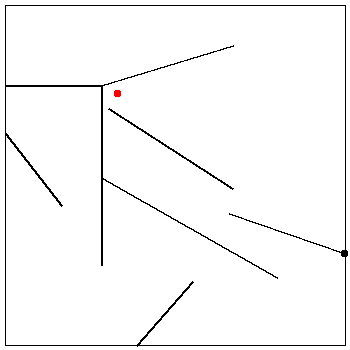

Step 380:


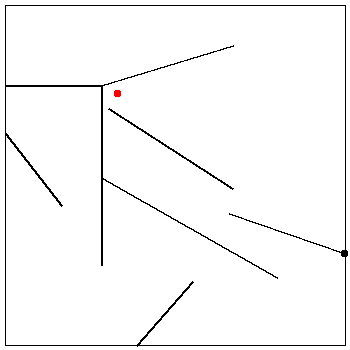

Step 399:


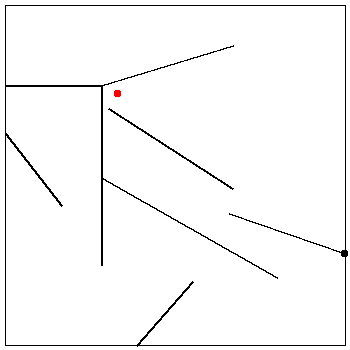

Step 400:


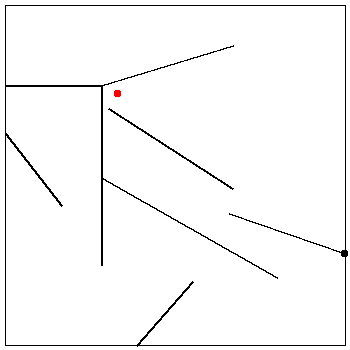

Timeout at 400 steps:


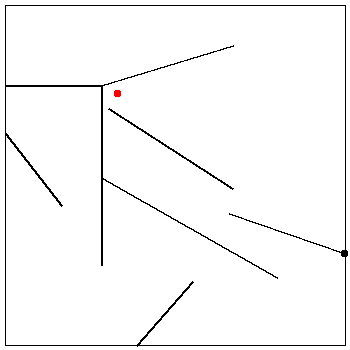

Data Frame: ES
          0          1          2   ...         47         48         49
0  35.954196  33.050000  33.050003  ...  33.049898  32.833621  34.466102
1  30.799962  32.669220  33.050013  ...  37.451574  31.425075  33.148092
2  36.281313  33.222348  33.046746  ...  33.238942  33.322110  33.050004
3  32.432435  33.058844  34.205996  ...  31.984899  33.304184  34.182232
4  33.108166  33.076899  32.742111  ...  33.050001  33.038499  33.050000
5  32.226610  33.050004  32.539704  ...  33.037377  33.050656  33.655302
6  33.048760  35.621165  33.050000  ...  33.050000  33.049899  38.444486
7  33.050176  33.156553  34.001687  ...  32.987567  31.639695  34.411906
8  39.605668  26.308966  33.044925  ...  33.050000  32.904914  33.034134
9  33.170416  33.049998  30.491868  ...  29.758889  30.032135  31.946391

[10 rows x 50 columns]
Data Frame: GA
          0          1          2   ...         47         48         49
0  40.518577  21.714194  46.442986  ...   5.381856   5.018901  12.7372

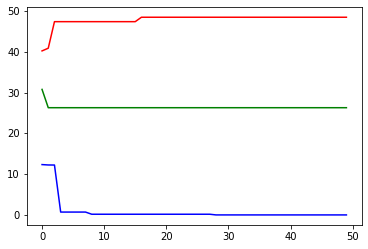

In [17]:
  import matplotlib.pyplot as plt
  #%matplotlib inline
  from tqdm import tqdm
  import os
  import numpy as np
  from shapely.geometry import Point, LineString
  import copy

  if __name__ == "__main__":

    network = NumpyNetwork(10, 128, 128, 2)
    evoES = ES(popsize=10, nParams=network.nParams, max_iter=50)
    evoGA = SimpleGA(popsize=10, num_params=network.nParams)
    evoCMAES = CMAES(popsize=10,num_params=network.nParams)
    evoGA.MAX_ITERATION = 50
    evoCMAES.MAX_ITERATION = 50 
    controller = ANNcontroller
    maze = testmaze

    ### Evolution Strategy Code
    if ESData == None:
      historyES = test_solver(evoES)
      ESData = historyES
      #pltESData = plt.plot(historyES['best'])
      dfES = pd.DataFrame.from_dict({i:historyES[i] for i in range(evoES.MAX_ITERATION)})
      print(dfES)
      network.update(evoES.bestParams)
      runSimulation(maze, controller, render=True)

    ### Genetic Alg Code
    if GAData == None:
      historyGA = test_solver(evoGA)
      GAData = historyGA
      #pltGAData = plt.plot(historyGA['best'])
      dfGA = pd.DataFrame.from_dict({i:historyGA[i] for i in range(evoGA.MAX_ITERATION)})
      print(dfGA)
      network.update(evoGA.best_param)
      runSimulation(maze, controller, render=True)

    ### CMA-ES Code
    if CMAESData == None:
      historyCMAES = test_solver(evoCMAES)
      CMAESData = historyCMAES
      dfCMAES = pd.DataFrame.from_dict({i:historyCMAES[i] for i in range(evoCMAES.MAX_ITERATION)})
      print(dfCMAES)
      network.update(evoCMAES.best_param())
      runSimulation(maze, controller, render=True)



    ##print
    print('Data Frame: ES')
    print(dfES)
    plt.plot(historyES['best'],color = "green")
    print('Data Frame: GA')
    print(dfGA)
    plt.plot(historyGA['best'], color="blue")
    print('Data Frame : CMAES')
    print(dfCMAES)
    plt.plot(historyCMAES['best'], color="red")

#testmaze standard deviation plot
In order to explain the variation of robots in different time steps I have ploted standard deviation graph which instantly help us to understand how far our robot is in search of our goal. 
best_iteration_testmaze is the line I consider as a base to explain this.
->If you see ES_standard_deviation_testmaze which is depicted in blue color it clearly shows that there is hardly any movement of robot towards the goal.
->Coming towards "GA_standard_deviation_testmaze" which is depicted in green color shows the perfect movement of the robot which explores the maze environment and reaches the goal while exploring the environment.
-> Moving forward towrds"CMAES_standard_deviation_testmaze" which is depicted in red color shows that the robot tries to explore the path but it gets lower fitness values and it gets killed up.

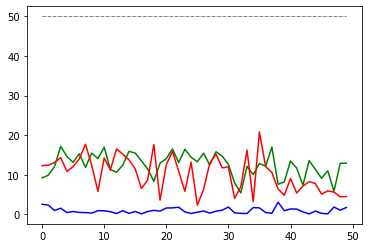

In [19]:
MAX_ITERATION = 50 
best_iteration_testmaze = [50] * MAX_ITERATION 
ES_standard_deviation_testmaze = dfES.std()
GA_standard_deviation_testmaze = dfGA.std()
CMAES_standard_deviation_testmaze = dfCMAES.std()
plt.plot(best_iteration_testmaze, color="black",linewidth=0.5, linestyle="-.")
plt.plot(ES_standard_deviation_testmaze,color="blue")
plt.plot(GA_standard_deviation_testmaze,color="green")
plt.plot(CMAES_standard_deviation_testmaze,color="red")

#WHICH ALGORITHM IS GOOD OF ALL 
-> Hardmaze (GA performs better as compare to EA and CMAES)
-> Mediummaze(GA performs better as compare to EA and CMAES)
-> Testmaze(GA performs better as compare to EA and CMAES)

In [17]:
pip install cma

#REFERENCE
https://github.com/hardmaru/estool